In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']


# **Split**

In [ ]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_rf_train, y_rf_train)

RandomForestClassifier(random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
rf.fit(X_train_final, y_train_final)


RandomForestClassifier(random_state=42)

In [ ]:
dt.fit(X_train_final, y_train_final)


DecisionTreeClassifier(random_state=42)

In [ ]:
voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt)], voting='soft')
voting_clf.fit(X_train_final, y_train_final)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test_final)
accuracy = accuracy_score(y_test_final, y_pred)
print(f"Soft Voting Ensemble Accuracy: {accuracy:.4f}")


Soft Voting Ensemble Accuracy: 0.9756


In [ ]:
# Step 10: Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary functions

y_pred = voting_clf.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test_final, y_pred))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_final, y_pred))

Accuracy: 0.9756

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2727
           1       0.96      0.97      0.97       418
           2       0.97      0.98      0.97      1855

    accuracy                           0.98      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.98      0.98      0.98      5000


Confusion Matrix:
 [[2663   11   53]
 [   8  406    4]
 [  41    5 1809]]


# **Another Model**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
mapping={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(mapping)
df.head()

,Status,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,...,False,False,True,True,False,True,False,False,False,True
1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,...,True,True,False,False,True,True,False,False,False,True
2,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,...,False,True,False,True,False,True,False,False,False,True
3,2,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,...,False,True,False,True,False,True,False,False,False,True
4,2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,...,False,False,True,True,False,True,False,False,False,True


In [ ]:
x=df.drop(["Status"],axis=1)
y=df[["Status"]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)
models={
    "Xgboost":XGBClassifier(n_estimators=100),
    "RandomForest":RandomForestClassifier(n_estimators=200),
    "GradientBoost":GradientBoostingClassifier(learning_rate=0.57)
}
for name,model in models.items():
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(y_test,pre)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.3f}")

Model: Xgboost
Accuracy: 0.983


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForest
Accuracy: 0.968


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: GradientBoost
Accuracy: 0.983


# **Using XGB & GradientBoost- 98.98**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
mapping={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(mapping)
df.head()

,Status,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,...,False,False,True,True,False,True,False,False,False,True
1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,...,True,True,False,False,True,True,False,False,False,True
2,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,...,False,True,False,True,False,True,False,False,False,True
3,2,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,...,False,True,False,True,False,True,False,False,False,True
4,2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,...,False,False,True,True,False,True,False,False,False,True


In [ ]:
x=df.drop(["Status"],axis=1)
y=df[["Status"]]

In [ ]:
models = {
    "Xgboost": XGBClassifier(n_estimators=100),
    "GradientBoost": GradientBoostingClassifier(learning_rate=0.57)
}


In [ ]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(learning_rate=0.57)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost
}


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('gboost', gboost)
], voting='soft')


In [ ]:
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:18:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.57))],
                 voting='soft')

In [ ]:
# 7. Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.9898

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2709    3   17]
 [   3  411    1]
 [  26    1 1829]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:20:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:20:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:21:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


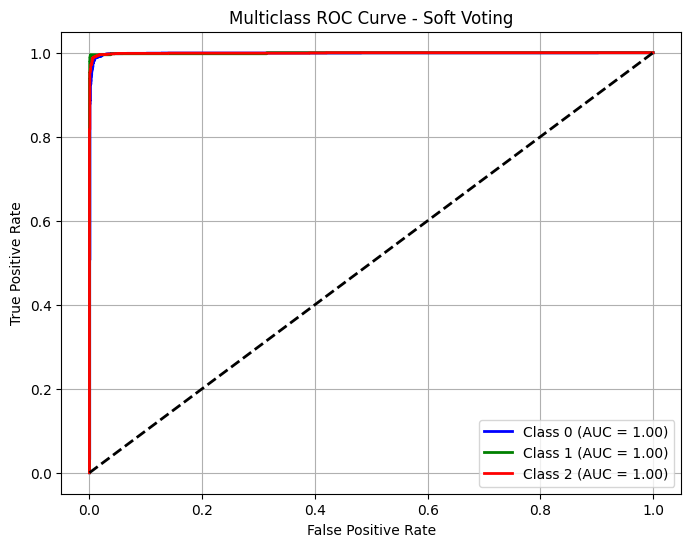

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Binarize the output for multiclass ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# OneVsRest soft voting for ROC
voting_clf_roc = OneVsRestClassifier(voting_clf)
voting_clf_roc.fit(X_train, y_train_bin)
y_score = voting_clf_roc.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Soft Voting")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **Using XGB & GradientBoost - 99.08**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
mapping={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(mapping)
df.head()

,Status,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,...,False,False,True,True,False,True,False,False,False,True
1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,...,True,True,False,False,True,True,False,False,False,True
2,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,...,False,True,False,True,False,True,False,False,False,True
3,2,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,...,False,True,False,True,False,True,False,False,False,True
4,2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,...,False,False,True,True,False,True,False,False,False,True


In [ ]:
x=df.drop(["Status"],axis=1)
y=df[["Status"]]

In [ ]:
models = {
    "Xgboost": XGBClassifier(n_estimators=100),
    "GradientBoost": GradientBoostingClassifier(learning_rate=0.58)
}


In [ ]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(learning_rate=0.58)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost
}


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('gboost', gboost)
], voting='soft')


In [ ]:
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:52:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.58))],
                 voting='soft')

In [ ]:
# 7. Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.9908

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      1.00      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    3   13]
 [   1  413    1]
 [  27    1 1828]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


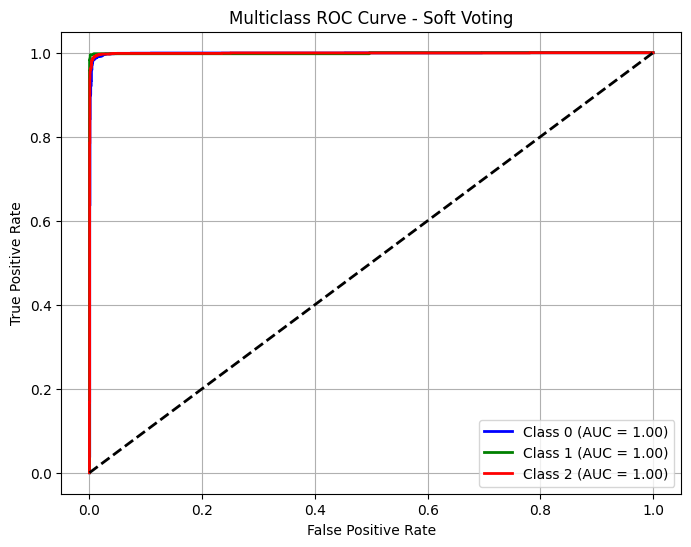

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Binarize the output for multiclass ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# OneVsRest soft voting for ROC
voting_clf_roc = OneVsRestClassifier(voting_clf)
voting_clf_roc.fit(X_train, y_train_bin)
y_score = voting_clf_roc.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Soft Voting")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **Hyperparameter Tuning**

Best params: {'xgb__n_estimators': 200, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.2, 'gboost__n_estimators': 100, 'gboost__learning_rate': 0.5}
Best CV score: 0.9908444444444445


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'gboost__n_estimators': [50, 100, 200],
    'gboost__learning_rate': [0.01, 0.1, 0.5]
}

voting = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('gboost', GradientBoostingClassifier())
], voting='soft')

search = RandomizedSearchCV(
    voting,
    param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)
print("Best CV score:", search.best_score_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:50:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params: {'xgb__n_estimators': 200, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.2, 'gboost__n_estimators': 100, 'gboost__learning_rate': 0.5}
Best CV score: 0.9908444444444445


# **Using XGB & GradientBoost - 99.1**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
mapping={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(mapping)
df.head()

,Status,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,...,False,False,True,True,False,True,False,False,False,True
1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,...,True,True,False,False,True,True,False,False,False,True
2,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,...,False,True,False,True,False,True,False,False,False,True
3,2,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,...,False,True,False,True,False,True,False,False,False,True
4,2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,...,False,False,True,True,False,True,False,False,False,True


In [ ]:
x=df.drop(["Status"],axis=1)
y=df[["Status"]]

In [ ]:
models = {
    "Xgboost": XGBClassifier(n_estimators=200),
    "GradientBoost": GradientBoostingClassifier(learning_rate=0.58)
}


In [ ]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
xgb = XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(learning_rate=0.58)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost
}


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('gboost', gboost)
], voting='soft')


In [ ]:
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:59:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.58))],
                 voting='soft')

In [ ]:
# 7. Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.991

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      1.00      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2714    2   13]
 [   1  413    1]
 [  27    1 1828]]


# **Using XGB & GradientBoost-Status - 99.1**

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
mapping={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(mapping)
df.head()

,Status,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,...,False,False,True,True,False,True,False,False,False,True
1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,...,True,True,False,False,True,True,False,False,False,True
2,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,...,False,True,False,True,False,True,False,False,False,True
3,2,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,...,False,True,False,True,False,True,False,False,False,True
4,2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,...,False,False,True,True,False,True,False,False,False,True


In [ ]:
x=df.drop(["Status"],axis=1)
y=df[["Status"]]

In [ ]:
models = {
    "Xgboost": XGBClassifier(n_estimators=200,learning_rate=0.2),
    "GradientBoost": GradientBoostingClassifier(n_estimators=100,learning_rate=0.58)
}


In [ ]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
xgb = XGBClassifier(n_estimators=200,learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.58)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost
}


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('gboost', gboost)
], voting='soft')


In [ ]:
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:05:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.58))],
                 voting='soft')

In [ ]:
# 7. Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.991

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    2   14]
 [   1  412    2]
 [  25    1 1830]]


# **Using XGB & GradientBoost- Status- 99.2533**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier # Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
from sklearn.ensemble import VotingClassifier # Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
mapping={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(mapping)
df.head()

,Status,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,...,False,False,True,True,False,True,False,False,False,True
1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,...,True,True,False,False,True,True,False,False,False,True
2,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,...,False,True,False,True,False,True,False,False,False,True
3,2,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,...,False,True,False,True,False,True,False,False,False,True
4,2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,...,False,False,True,True,False,True,False,False,False,True


In [ ]:
x=df.drop(["Status"],axis=1)
y=df[["Status"]]

In [ ]:
models = {
    "Xgboost": XGBClassifier(n_estimators=200,learning_rate=0.2),
    "GradientBoost": GradientBoostingClassifier(n_estimators=100,learning_rate=0.58)
}


In [ ]:
# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)


In [ ]:
xgb = XGBClassifier(n_estimators=200,learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.58)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost
}


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('gboost', gboost)
], voting='soft')


In [ ]:
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:33:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.58))],
                 voting='soft')

In [ ]:
# 7. Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.9925333333333334

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1981
           1       1.00      0.99      0.99       310
           2       0.99      0.99      0.99      1459

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750


🧮 Confusion Matrix:
 [[1972    1    8]
 [   2  307    1]
 [  16    0 1443]]


In [ ]:
import pickle
from sklearn.ensemble import VotingClassifier

# Your trained model (assuming you have a trained VotingClassifier instance)
model = VotingClassifier(...)  # Replace with your actual model

# Save the model
with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)


# **Using XGB & GradientBoost Status- 99.42**

In [ ]:
import pandas as pd

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [ ]:
df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
mapping={"C":0,"CL":1,"D":2}
df["Status"]=df["Status"].map(mapping)
df.head()

,Status,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,...,False,False,True,True,False,True,False,False,False,True
1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,...,True,True,False,False,True,True,False,False,False,True
2,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,...,False,True,False,True,False,True,False,False,False,True
3,2,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,...,False,True,False,True,False,True,False,False,False,True
4,2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,...,False,False,True,True,False,True,False,False,False,True


In [ ]:
x=df.drop(["Status"],axis=1)
y=df[["Status"]]

In [ ]:
models = {
    "Xgboost": XGBClassifier(n_estimators=200,learning_rate=0.2),
    "GradientBoost": GradientBoostingClassifier(n_estimators=100,learning_rate=0.58)
}


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
xgb = XGBClassifier(n_estimators=200,learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.58)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost
}


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('gboost', gboost)
], voting='soft')


In [ ]:
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:46:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.58))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.9942

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2673
           1       1.00      0.99      1.00       415
           2       1.00      0.99      0.99      1912

    accuracy                           0.99      5000
   macro avg       1.00      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2664    1    8]
 [   3  412    0]
 [  17    0 1895]]


In [ ]:
import pickle

with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)


# **Deployment Using Gradio**

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pickle

# Assuming X is your DataFrame or NumPy array containing the features
model_columns = list(x.columns)  # Get the column names

with open('model_columns.pkl', 'wb') as f:
    pickle.dump(model_columns, f)

In [ ]:
import gradio as gr
import pickle
import pandas as pd

# Load model
with open('voting_classifier_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load model columns
with open('model_columns.pkl', 'rb') as f:
    model_columns = pickle.load(f)

# Prediction function
def predict_model(n_days, drug, age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol, albumin,
                  copper, alk_phos, sgot, triglycerides, platelets, prothrombin, stage):

    df = pd.DataFrame([{
        "N_Days": n_days,
        "Drug": drug,
        "Age": age,
        "Sex": sex,
        "Ascites": ascites,
        "Hepatomegaly": hepatomegaly,
        "Spiders": spiders,
        "Edema": edema,
        "Bilirubin": bilirubin,
        "Cholesterol": cholesterol,
        "Albumin": albumin,
        "Copper": copper,
        "Alk_Phos": alk_phos,
        "SGOT": sgot,
        "Triglycerides": triglycerides,
        "Platelets": platelets,
        "Prothrombin": prothrombin,
        "Stage": stage
    }])

    df = pd.get_dummies(df)
    for col in model_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[model_columns]

    prediction = model.predict(df)[0]
    mapping = {0: "C", 1: "CL", 2: "D"}
    meaning = {
        "C": "Censored (Patient is still alive or status unknown)",
        "CL": "Censored due to liver transplant",
        "D": "Death (Patient has passed away)"
    }
    color_map = {"C": "#FFA07A", "CL": "#FFD700", "D": "#90EE90"}

    # Return styled HTML output
    return f"""
    <div style="text-align:center; padding: 10px;">
        <h2 style='color:{color_map[mapping[prediction]]};'>
            🧬 Predicted Cirrhosis Class: <b>{mapping[prediction]}</b>
        </h2>
        <p style="font-size: 16px; font-style: italic;">
            {meaning[mapping[prediction]]}
        </p>
        <hr style="margin: 20px auto; width: 50%;">
        <div style="text-align:left; font-size: 14px;">
            <b>Class Descriptions:</b><br>
            🔵 <b>C</b> - Censored (alive or lost to follow-up)<br>
            🟡 <b>CL</b> - Censored due to liver transplant<br>
            🔴 <b>D</b> - Death (event occurred)
        </div>
    </div>
    """

# UI layout
with gr.Blocks(title="Liver Cirrhosis Prediction") as demo:
    gr.Markdown("## 🧫 Liver Cirrhosis Predictor")
    gr.Markdown("Fill out the patient details below to get a prediction of the cirrhosis class.")

    with gr.Row():
        with gr.Column():
            n_days = gr.Slider(0, 8000, step=1, label="N_Days", info="Days from registration to death/transplant/study end (1986)")
            drug = gr.Dropdown(['D-penicillamine', 'Placebo'], label="Drug Type")
            age = gr.Slider(0, 35000, step=1, label="Age (in days)")
            sex = gr.Dropdown(['M', 'F'], label="Sex")
            ascites = gr.Dropdown(['N', 'Y'], label="Ascites", info="Presence of ascites (fluid buildup in abdomen)")
            hepatomegaly = gr.Dropdown(['N', 'Y'], label="Hepatomegaly", info="Enlarged liver")
            spiders = gr.Dropdown(['N', 'Y'], label="Spiders", info="Spider angiomata presence")
            edema = gr.Dropdown(['N', 'S', 'Y'], label="Edema", info="N: No edema, S: Controlled by diuretics, Y: Not responsive to diuretics")

        with gr.Column():
            bilirubin = gr.Slider(0.0, 20.0, step=0.1, label="Bilirubin (mg/dL)")
            cholesterol = gr.Slider(0, 1000, label="Cholesterol (mg/dL)")
            albumin = gr.Slider(1.0, 5.0, step=0.1, label="Albumin (g/dL)")
            copper = gr.Slider(0, 500, label="Urine Copper (μg/day)")
            alk_phos = gr.Slider(0, 3000, label="Alkaline Phosphatase (U/L)")
            sgot = gr.Slider(0, 500, label="SGOT (U/mL)")
            triglycerides = gr.Slider(0, 500, label="Triglycerides (mg/dL)")
            platelets = gr.Slider(0, 1000, label="Platelets (x1000/mL)")
            prothrombin = gr.Slider(0.0, 20.0, step=0.1, label="Prothrombin Time (sec)")
            stage = gr.Slider(1, 3, step=1, label="Stage", info="Histologic stage of disease (1-3)")

    predict_btn = gr.Button("📊 Predict Cirrhosis Class")
    result_output = gr.HTML()

    predict_btn.click(
        predict_model,
        inputs=[
            n_days, drug, age, sex, ascites, hepatomegaly, spiders, edema,
            bilirubin, cholesterol, albumin, copper, alk_phos, sgot,
            triglycerides, platelets, prothrombin, stage
        ],
        outputs=result_output
    )

demo.launch(share=True, debug=True)  # Set share=True to create a public link and set debug=True to show errors in colab notebook

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://98a5cf22a2310d8da1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://98a5cf22a2310d8da1.gradio.live


# **Try Using Voila**

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pickle

# 1. Load your trained model
with open('voting_classifier_model.pkl', 'rb') as f: # Assuming your model is saved as 'voting_classifier_model.pkl'
    model = pickle.load(f)

# 2. Define a function to preprocess user input
def preprocess_input(age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol, albumin, copper, alk_phos, sgot, triglycerides, platelets, prothrombin, stage, drug):
    """Converts user input into a format suitable for the model."""

    # Create a dictionary to hold the features
    features = {
        "Age": age,
        "Sex": sex,
        "Ascites": ascites,
        "Hepatomegaly": hepatomegaly,
        "Spiders": spiders,
        "Edema": edema,
        "Bilirubin": bilirubin,
        "Cholesterol": cholesterol,
        "Albumin": albumin,
        "Copper": copper,
        "Alk_Phos": alk_phos,
        "SGOT": sgot,
        "Triglycerides": triglycerides,
        "Platelets": platelets,
        "Prothrombin": prothrombin,
        "Stage": stage,
        "Drug": drug
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([features])

    # One-hot encoding for categorical features
    input_df = pd.get_dummies(input_df, columns=["Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug"])

    # Align columns with training data (ensure all columns are present)
    # Get missing columns in input_df compared to training data
    missing_cols = set(X_train.columns) - set(input_df.columns)

    # Add missing columns with 0 values to input_df
    for c in missing_cols:
        input_df[c] = 0

    # Reorder columns to match training data
    input_df = input_df[X_train.columns]

    return input_df

# 3. Create widgets for input
# I've included all relevant features based on your notebook
age = widgets.IntSlider(min=0, max=100, description='Age:')
sex = widgets.Dropdown(options=['M', 'F'], description='Sex:')
ascites = widgets.Dropdown(options=['N', 'Y'], description='Ascites:')
hepatomegaly = widgets.Dropdown(options=['N', 'Y'], description='Hepatomegaly:')
spiders = widgets.Dropdown(options=['N', 'Y'], description='Spiders:')
edema = widgets.Dropdown(options=['N', 'S', 'Y'], description='Edema:')
bilirubin = widgets.FloatSlider(min=0.0, max=20.0, step=0.1, description='Bilirubin:')
cholesterol = widgets.IntSlider(min=0, max=1000, description='Cholesterol:')
albumin = widgets.FloatSlider(min=1.0, max=5.0, step=0.1, description='Albumin:')
copper = widgets.IntSlider(min=0, max=500, description='Copper:')
alk_phos = widgets.IntSlider(min=0, max=3000, description='Alk Phos:')
sgot = widgets.IntSlider(min=0, max=500, description='SGOT:')
triglycerides = widgets.IntSlider(min=0, max=500, description='Triglycerides:')
platelets = widgets.IntSlider(min=0, max=500000, description='Platelets:')
prothrombin = widgets.FloatSlider(min=0.0, max=20.0, step=0.1, description='Prothrombin:')
stage = widgets.IntSlider(min=1, max=4, description='Stage:')
drug = widgets.Dropdown(options=['D-penicillamine', 'Placebo'], description='Drug:')

# 4. Define prediction function
def predict_model(change):
    input_df = preprocess_input(
        age.value, sex.value, ascites.value, hepatomegaly.value, spiders.value,
        edema.value, bilirubin.value, cholesterol.value, albumin.value,
        copper.value, alk_phos.value, sgot.value, triglycerides.value,
        platelets.value, prothrombin.value, stage.value, drug.value
    )
    prediction = model.predict(input_df)

    # Mapping the prediction back to the original labels
    mapping = {0: "C", 1: "CL", 2: "D"}
    predicted_status = mapping[prediction[0]]

    print("Prediction:", predicted_status)

# 5. Button to trigger prediction
button = widgets.Button(description="Predict")
button.on_click(predict_model)

# 6. Display widgets
display(age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol, albumin, copper, alk_phos, sgot, triglycerides, platelets, prothrombin, stage, drug, button)

IntSlider(value=0, description='Age:')

Dropdown(description='Sex:', options=('M', 'F'), value='M')

Dropdown(description='Ascites:', options=('N', 'Y'), value='N')

Dropdown(description='Hepatomegaly:', options=('N', 'Y'), value='N')

Dropdown(description='Spiders:', options=('N', 'Y'), value='N')

Dropdown(description='Edema:', options=('N', 'S', 'Y'), value='N')

FloatSlider(value=0.0, description='Bilirubin:', max=20.0)

IntSlider(value=0, description='Cholesterol:', max=1000)

FloatSlider(value=1.0, description='Albumin:', max=5.0, min=1.0)

IntSlider(value=0, description='Copper:', max=500)

IntSlider(value=0, description='Alk Phos:', max=3000)

IntSlider(value=0, description='SGOT:', max=500)

IntSlider(value=0, description='Triglycerides:', max=500)

IntSlider(value=0, description='Platelets:', max=500000)

FloatSlider(value=0.0, description='Prothrombin:', max=20.0)

IntSlider(value=1, description='Stage:', max=4, min=1)

Dropdown(description='Drug:', options=('D-penicillamine', 'Placebo'), value='D-penicillamine')

Button(description='Predict', style=ButtonStyle())

Prediction: C


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pickle
import pandas as pd
import voila # Import voila

# 1. Load your trained model
with open('voting_classifier_model.pkl', 'rb') as f: # Replace with your model file name
    model = pickle.load(f)

# 2. Define a function to preprocess user input
def preprocess_input(age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol, albumin, copper, alk_phos, sgot, triglycerides, platelets, prothrombin, stage, drug):
    """Converts user input into a format suitable for the model."""
    features = {
        "Age": age,
        "Sex": sex,
        "Ascites": ascites,
        "Hepatomegaly": hepatomegaly,
        "Spiders": spiders,
        "Edema": edema,
        "Bilirubin": bilirubin,
        "Cholesterol": cholesterol,
        "Albumin": albumin,
        "Copper": copper,
        "Alk_Phos": alk_phos,
        "SGOT": sgot,
        "Triglycerides": triglycerides,
        "Platelets": platelets,
        "Prothrombin": prothrombin,
        "Stage": stage,
        "Drug": drug
    }
    input_df = pd.DataFrame([features])
    input_df = pd.get_dummies(input_df, columns=["Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug"])

    # Assuming X_train is available from your training data
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for c in missing_cols:
        input_df[c] = 0
    input_df = input_df[X_train.columns]

    return input_df

# 3. Create input widgets
age = widgets.IntSlider(min=0, max=100, description='Age:')
sex = widgets.Dropdown(options=['M', 'F'], description='Sex:')
ascites = widgets.Dropdown(options=['N', 'Y'], description='Ascites:')
hepatomegaly = widgets.Dropdown(options=['N', 'Y'], description='Hepatomegaly:')
spiders = widgets.Dropdown(options=['N', 'Y'], description='Spiders:')
edema = widgets.Dropdown(options=['N', 'S', 'Y'], description='Edema:')
bilirubin = widgets.FloatSlider(min=0.0, max=20.0, step=0.1, description='Bilirubin:')
cholesterol = widgets.IntSlider(min=0, max=1000, description='Cholesterol:')
albumin = widgets.FloatSlider(min=1.0, max=5.0, step=0.1, description='Albumin:')
copper = widgets.IntSlider(min=0, max=500, description='Copper:')
alk_phos = widgets.IntSlider(min=0, max=3000, description='Alk Phos:')
sgot = widgets.IntSlider(min=0, max=500, description='SGOT:')
triglycerides = widgets.IntSlider(min=0, max=500, description='Triglycerides:')
platelets = widgets.IntSlider(min=0, max=500000, description='Platelets:')
prothrombin = widgets.FloatSlider(min=0.0, max=20.0, step=0.1, description='Prothrombin:')
stage = widgets.IntSlider(min=1, max=4, description='Stage:')
drug = widgets.Dropdown(options=['D-penicillamine', 'Placebo'], description='Drug:')


# 4. Define prediction and display function
def predict_and_display(age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol, albumin, copper, alk_phos, sgot, triglycerides, platelets, prothrombin, stage, drug):
    input_df = preprocess_input(age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol, albumin, copper, alk_phos, sgot, triglycerides, platelets, prothrombin, stage, drug)
    prediction = model.predict(input_df)

    # Mapping the prediction back to the original labels
    mapping = {0: "C", 1: "CL", 2: "D"}
    predicted_status = mapping[prediction[0]]

    # Display the prediction in a formatted way
    display(widgets.HTML(value=f"<h2>Prediction: {predicted_status}</h2>"))

# 5. Create an interactive output
out = widgets.interactive_output(predict_and_display, {
    'age': age, 'sex': sex, 'ascites': ascites, 'hepatomegaly': hepatomegaly,
    'spiders': spiders, 'edema': edema, 'bilirubin': bilirubin,
    'cholesterol': cholesterol, 'albumin': albumin, 'copper': copper,
    'alk_phos': alk_phos, 'sgot': sgot, 'triglycerides': triglycerides,
    'platelets': platelets, 'prothrombin': prothrombin, 'stage': stage,
    'drug': drug
})

# 6. Display widgets and output
display(widgets.VBox([age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol, albumin, copper, alk_phos, sgot, triglycerides, platelets, prothrombin, stage, drug, out])) # Arrange using VBox

# **Cross‑Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_clf, X, y, cv=5, scoring='accuracy')
print("5‑fold CV accuracy:", scores.mean(), "±", scores.std())


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 

# **Feature Engineering**

Polynomial Features: capture interactions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model using polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Feature Selection: remove noisy or redundant features

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
X_sel = sel.fit_transform(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:39:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
X_test_sel = sel.transform(X_test)

In [ ]:
# Assuming 'model' is your chosen model (e.g., voting_clf)
model.fit(X_sel, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:39:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.58))],
                 voting='soft')

In [ ]:
y_pred = model.predict(X_test_sel)

# Evaluate performance using appropriate metrics (e.g., accuracy_score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9894


# **Ensemble & Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack = StackingClassifier(
    estimators=[('xgb', xgb), ('gboost', gboost)],
    final_estimator=LogisticRegression(),
    cv=5
)
stack.fit(X_train, y_train)
print("Stacked accuracy:", accuracy_score(y_test, stack.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacked accuracy: 0.991


# **Data sampling**

In [ ]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [ ]:
voting_clf.fit(X_res, y_res)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:12:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.58))],
                 voting='soft')

In [ ]:
# 7. Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.988

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  25    3 1828]]


In [ ]:
!pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.combine import SMOTETomek

# Assuming you have your X_train, y_train, X_test, y_test ready

# Define your models (XGBoost and GradientBoosting)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.58)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('gboost', gboost)], voting='soft')

# Define sampling techniques
samplers = {
    "SMOTE": SMOTE(random_state=42),
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "NearMiss": NearMiss(version=1),  # You can change the version (1, 2, 3)
    "TomekLinks": TomekLinks(),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Loop through sampling techniques
for sampler_name, sampler in samplers.items():
    print(f"Applying {sampler_name}...")

    # Resample the training data
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Fit the VotingClassifier on resampled data
    voting_clf.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = voting_clf.predict(X_test)

    # Evaluate and print results
    print(f"✅ Soft Voting Accuracy ({sampler_name}): {accuracy_score(y_test, y_pred):.4f}")
    print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
    print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)  # Separator for better readability

Applying SMOTE...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:14:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE): 0.9882

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  24    3 1829]]
------------------------------
Applying RandomOverSampler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:14:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler): 0.9900

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2710    3   16]
 [   1  412    2]
 [  25    3 1828]]
------------------------------
Applying ADASYN...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN): 0.9870

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.98      0.98       415
           2       0.98      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2698    6   25]
 [   5  406    4]
 [  22    3 1831]]
------------------------------
Applying RandomUnderSampler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler): 0.9804

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.99      0.98       415
           2       0.98      0.98      0.98      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2679   10   40]
 [   3  411    1]
 [  41    3 1812]]
------------------------------
Applying NearMiss...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss): 0.3184

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43      2729
           1       0.11      1.00      0.20       415
           2       0.85      0.22      0.35      1856

    accuracy                           0.32      5000
   macro avg       0.64      0.50      0.33      5000
weighted avg       0.85      0.32      0.38      5000


🧮 Confusion Matrix:
 [[ 763 1893   73]
 [   1  414    0]
 [  32 1409  415]]
------------------------------
Applying TomekLinks...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks): 0.9902

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       1.00      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2712    2   15]
 [   3  411    1]
 [  28    0 1828]]
------------------------------
Applying SMOTETomek...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:16:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek): 0.9878

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2705    5   19]
 [   3  410    2]
 [  28    4 1824]]
------------------------------


# **Test Sampling with Scalling Methods**

In [ ]:
!pip install imbalanced-learn
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer


# Assuming you have your X_train, y_train, X_test, y_test ready

# Define your models (XGBoost and GradientBoosting)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.58)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('gboost', gboost)], voting='soft')

# Define sampling techniques
samplers = {
    "SMOTE": SMOTE(random_state=42),
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "NearMiss": NearMiss(version=1),  # You can change the version (1, 2, 3)
    "TomekLinks": TomekLinks(),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Define scaling methods
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal'),
    "PowerTransformer": PowerTransformer(method='yeo-johnson')  # You can also use 'box-cox'
}

# Loop through sampling techniques and scaling methods
for sampler_name, sampler in samplers.items():
    for scaler_name, scaler in scalers.items():
        print(f"Applying {sampler_name} and {scaler_name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        # Scale the resampled data
        X_resampled_scaled = scaler.fit_transform(X_resampled)

        # Fit the VotingClassifier on resampled and scaled data
        voting_clf.fit(X_resampled_scaled, y_resampled)

        # Scale the test data using the same scaler
        X_test_scaled = scaler.transform(X_test)

        # Predict on the scaled test set
        y_pred = voting_clf.predict(X_test_scaled)

        # Evaluate and print results
        print(f"✅ Soft Voting Accuracy ({sampler_name}, {scaler_name}): {accuracy_score(y_test, y_pred):.4f}")
        print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
        print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 50)  # Separator

Applying SMOTE and StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE, StandardScaler): 0.9880

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  25    3 1828]]
--------------------------------------------------
Applying SMOTE and MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:18:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE, MinMaxScaler): 0.9882

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  24    3 1829]]
--------------------------------------------------
Applying SMOTE and RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE, RobustScaler): 0.9882

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  24    3 1829]]
--------------------------------------------------
Applying SMOTE and MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE, MaxAbsScaler): 0.9884

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  23    3 1830]]
--------------------------------------------------
Applying SMOTE and Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE, Normalizer): 0.9758

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.97      0.97       415
           2       0.98      0.97      0.97      1856

    accuracy                           0.98      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2681    9   39]
 [  12  401    2]
 [  56    3 1797]]
--------------------------------------------------
Applying SMOTE and QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:21:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE, QuantileTransformer): 0.9880

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  25    3 1828]]
--------------------------------------------------
Applying SMOTE and PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:21:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTE, PowerTransformer): 0.9882

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2702    6   21]
 [   2  410    3]
 [  24    3 1829]]
--------------------------------------------------
Applying RandomOverSampler and StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:22:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler, StandardScaler): 0.9900

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2710    3   16]
 [   1  412    2]
 [  25    3 1828]]
--------------------------------------------------
Applying RandomOverSampler and MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:22:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler, MinMaxScaler): 0.9900

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2710    3   16]
 [   1  412    2]
 [  25    3 1828]]
--------------------------------------------------
Applying RandomOverSampler and RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:22:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler, RobustScaler): 0.9900

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2710    3   16]
 [   1  412    2]
 [  25    3 1828]]
--------------------------------------------------
Applying RandomOverSampler and MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:23:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler, MaxAbsScaler): 0.9898

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2710    3   16]
 [   1  412    2]
 [  26    3 1827]]
--------------------------------------------------
Applying RandomOverSampler and Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler, Normalizer): 0.9784

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.99      0.98      0.98       415
           2       0.98      0.97      0.97      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2686    5   38]
 [   6  407    2]
 [  56    1 1799]]
--------------------------------------------------
Applying RandomOverSampler and QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler, QuantileTransformer): 0.9898

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2710    3   16]
 [   1  412    2]
 [  26    3 1827]]
--------------------------------------------------
Applying RandomOverSampler and PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:24:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomOverSampler, PowerTransformer): 0.9898

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2710    3   16]
 [   1  412    2]
 [  26    3 1827]]
--------------------------------------------------
Applying ADASYN and StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:24:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN, StandardScaler): 0.9870

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.98      0.98       415
           2       0.98      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2698    6   25]
 [   5  406    4]
 [  22    3 1831]]
--------------------------------------------------
Applying ADASYN and MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:25:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN, MinMaxScaler): 0.9870

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.98      0.98       415
           2       0.98      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2698    6   25]
 [   5  406    4]
 [  22    3 1831]]
--------------------------------------------------
Applying ADASYN and RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN, RobustScaler): 0.9870

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.98      0.98       415
           2       0.98      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2698    6   25]
 [   5  406    4]
 [  22    3 1831]]
--------------------------------------------------
Applying ADASYN and MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN, MaxAbsScaler): 0.9868

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.98      0.98       415
           2       0.98      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.98      0.99      0.98      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2695    7   27]
 [   4  407    4]
 [  23    1 1832]]
--------------------------------------------------
Applying ADASYN and Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:27:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN, Normalizer): 0.9720

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.96      0.95      0.96       415
           2       0.97      0.97      0.97      1856

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


🧮 Confusion Matrix:
 [[2663   11   55]
 [  16  394    5]
 [  49    4 1803]]
--------------------------------------------------
Applying ADASYN and QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:28:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN, QuantileTransformer): 0.9868

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.98      0.98       415
           2       0.98      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2697    6   26]
 [   5  406    4]
 [  22    3 1831]]
--------------------------------------------------
Applying ADASYN and PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:28:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (ADASYN, PowerTransformer): 0.9870

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.98      0.98       415
           2       0.98      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2698    6   25]
 [   5  406    4]
 [  22    3 1831]]
--------------------------------------------------
Applying RandomUnderSampler and StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler, StandardScaler): 0.9806

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.99      0.98       415
           2       0.98      0.98      0.98      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2680   10   39]
 [   3  411    1]
 [  41    3 1812]]
--------------------------------------------------
Applying RandomUnderSampler and MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler, MinMaxScaler): 0.9808

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.99      0.98       415
           2       0.98      0.98      0.98      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2680   10   39]
 [   3  411    1]
 [  40    3 1813]]
--------------------------------------------------
Applying RandomUnderSampler and RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler, RobustScaler): 0.9802

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.99      0.98       415
           2       0.98      0.98      0.98      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2678   10   41]
 [   3  411    1]
 [  41    3 1812]]
--------------------------------------------------
Applying RandomUnderSampler and MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler, MaxAbsScaler): 0.9806

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.99      0.98       415
           2       0.98      0.98      0.98      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2680   10   39]
 [   3  411    1]
 [  41    3 1812]]
--------------------------------------------------
Applying RandomUnderSampler and Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler, Normalizer): 0.9560

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2729
           1       0.93      0.98      0.95       415
           2       0.95      0.95      0.95      1856

    accuracy                           0.96      5000
   macro avg       0.95      0.96      0.95      5000
weighted avg       0.96      0.96      0.96      5000


🧮 Confusion Matrix:
 [[2606   22  101]
 [   7  407    1]
 [  78   11 1767]]
--------------------------------------------------
Applying RandomUnderSampler and QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler, QuantileTransformer): 0.9804

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.99      0.98       415
           2       0.98      0.98      0.98      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2679   10   40]
 [   3  411    1]
 [  41    3 1812]]
--------------------------------------------------
Applying RandomUnderSampler and PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RandomUnderSampler, PowerTransformer): 0.9806

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2729
           1       0.97      0.99      0.98       415
           2       0.98      0.98      0.98      1856

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000


🧮 Confusion Matrix:
 [[2680   10   39]
 [   3  411    1]
 [  41    3 1812]]
--------------------------------------------------
Applying NearMiss and StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss, StandardScaler): 0.3184

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43      2729
           1       0.11      1.00      0.20       415
           2       0.85      0.22      0.35      1856

    accuracy                           0.32      5000
   macro avg       0.64      0.50      0.33      5000
weighted avg       0.85      0.32      0.38      5000


🧮 Confusion Matrix:
 [[ 763 1893   73]
 [   1  414    0]
 [  32 1409  415]]
--------------------------------------------------
Applying NearMiss and MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss, MinMaxScaler): 0.3176

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43      2729
           1       0.11      1.00      0.20       415
           2       0.85      0.22      0.35      1856

    accuracy                           0.32      5000
   macro avg       0.64      0.50      0.33      5000
weighted avg       0.85      0.32      0.38      5000


🧮 Confusion Matrix:
 [[ 762 1894   73]
 [   1  414    0]
 [  32 1412  412]]
--------------------------------------------------
Applying NearMiss and RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss, RobustScaler): 0.3186

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43      2729
           1       0.11      1.00      0.20       415
           2       0.85      0.22      0.35      1856

    accuracy                           0.32      5000
   macro avg       0.64      0.50      0.33      5000
weighted avg       0.85      0.32      0.38      5000


🧮 Confusion Matrix:
 [[ 764 1893   72]
 [   1  414    0]
 [  32 1409  415]]
--------------------------------------------------
Applying NearMiss and MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss, MaxAbsScaler): 0.3176

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43      2729
           1       0.11      1.00      0.20       415
           2       0.85      0.22      0.35      1856

    accuracy                           0.32      5000
   macro avg       0.64      0.50      0.33      5000
weighted avg       0.85      0.32      0.38      5000


🧮 Confusion Matrix:
 [[ 762 1895   72]
 [   1  414    0]
 [  32 1412  412]]
--------------------------------------------------
Applying NearMiss and Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss, Normalizer): 0.3024

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.25      0.40      2729
           1       0.11      1.00      0.20       415
           2       0.75      0.22      0.34      1856

    accuracy                           0.30      5000
   macro avg       0.61      0.49      0.31      5000
weighted avg       0.81      0.30      0.36      5000


🧮 Confusion Matrix:
 [[ 685 1909  135]
 [   1  413    1]
 [  30 1412  414]]
--------------------------------------------------
Applying NearMiss and QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss, QuantileTransformer): 0.3192

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43      2729
           1       0.11      1.00      0.20       415
           2       0.85      0.23      0.36      1856

    accuracy                           0.32      5000
   macro avg       0.64      0.50      0.33      5000
weighted avg       0.85      0.32      0.39      5000


🧮 Confusion Matrix:
 [[ 764 1893   72]
 [   1  414    0]
 [  33 1405  418]]
--------------------------------------------------
Applying NearMiss and PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (NearMiss, PowerTransformer): 0.3186

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.28      0.43      2729
           1       0.11      1.00      0.20       415
           2       0.85      0.22      0.35      1856

    accuracy                           0.32      5000
   macro avg       0.64      0.50      0.33      5000
weighted avg       0.85      0.32      0.38      5000


🧮 Confusion Matrix:
 [[ 764 1892   73]
 [   1  414    0]
 [  32 1409  415]]
--------------------------------------------------
Applying TomekLinks and StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks, StandardScaler): 0.9900

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2712    2   15]
 [   3  411    1]
 [  28    1 1827]]
--------------------------------------------------
Applying TomekLinks and MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks, MinMaxScaler): 0.9900

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2712    2   15]
 [   3  411    1]
 [  28    1 1827]]
--------------------------------------------------
Applying TomekLinks and RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks, RobustScaler): 0.9902

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       1.00      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2712    2   15]
 [   3  411    1]
 [  28    0 1828]]
--------------------------------------------------
Applying TomekLinks and MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:31:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks, MaxAbsScaler): 0.9902

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       1.00      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2712    2   15]
 [   3  411    1]
 [  28    0 1828]]
--------------------------------------------------
Applying TomekLinks and Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:31:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks, Normalizer): 0.9736

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2729
           1       0.96      0.97      0.96       415
           2       0.98      0.96      0.97      1856

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


🧮 Confusion Matrix:
 [[2680   14   35]
 [  12  401    2]
 [  65    4 1787]]
--------------------------------------------------
Applying TomekLinks and QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks, QuantileTransformer): 0.9900

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       1.00      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2712    2   15]
 [   3  410    2]
 [  28    0 1828]]
--------------------------------------------------
Applying TomekLinks and PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (TomekLinks, PowerTransformer): 0.9898

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2712    2   15]
 [   3  410    2]
 [  28    1 1827]]
--------------------------------------------------
Applying SMOTETomek and StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek, StandardScaler): 0.9878

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2705    5   19]
 [   3  410    2]
 [  29    3 1824]]
--------------------------------------------------
Applying SMOTETomek and MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek, MinMaxScaler): 0.9880

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2705    5   19]
 [   3  410    2]
 [  28    3 1825]]
--------------------------------------------------
Applying SMOTETomek and RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:33:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek, RobustScaler): 0.9878

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2705    5   19]
 [   3  410    2]
 [  28    4 1824]]
--------------------------------------------------
Applying SMOTETomek and MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:34:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek, MaxAbsScaler): 0.9878

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2705    5   19]
 [   3  410    2]
 [  28    4 1824]]
--------------------------------------------------
Applying SMOTETomek and Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:34:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek, Normalizer): 0.9736

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2729
           1       0.97      0.96      0.96       415
           2       0.97      0.97      0.97      1856

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


🧮 Confusion Matrix:
 [[2676    9   44]
 [  13  399    3]
 [  59    4 1793]]
--------------------------------------------------
Applying SMOTETomek and QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:35:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek, QuantileTransformer): 0.9876

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2705    5   19]
 [   3  410    2]
 [  29    4 1823]]
--------------------------------------------------
Applying SMOTETomek and PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:36:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (SMOTETomek, PowerTransformer): 0.9876

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.98      0.99      0.98       415
           2       0.99      0.98      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2705    5   19]
 [   3  410    2]
 [  29    4 1823]]
--------------------------------------------------


# **Test Only Scalling Methods**

In [ ]:
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer

# Assuming you have your X_train, y_train, X_test, y_test ready

# Define your models (XGBoost and GradientBoosting)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.58)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('gboost', gboost)], voting='soft')

# Define scaling methods
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal'),
    "PowerTransformer": PowerTransformer(method='yeo-johnson')  # You can also use 'box-cox'
}

# Loop through scaling methods
for scaler_name, scaler in scalers.items():
    print(f"Applying {scaler_name}...")

    # Scale the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Fit the VotingClassifier on scaled data
    voting_clf.fit(X_train_scaled, y_train)

    # Predict on the scaled test set
    y_pred = voting_clf.predict(X_test_scaled)

    # Evaluate and print results
    print(f"✅ Soft Voting Accuracy ({scaler_name}): {accuracy_score(y_test, y_pred):.4f}")
    print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
    print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)  # Separator

Applying StandardScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:25:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (StandardScaler): 0.9910

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    2   14]
 [   1  412    2]
 [  25    1 1830]]
--------------------------------------------------
Applying MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (MinMaxScaler): 0.9910

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    2   14]
 [   1  412    2]
 [  25    1 1830]]
--------------------------------------------------
Applying RobustScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (RobustScaler): 0.9910

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    2   14]
 [   1  412    2]
 [  25    1 1830]]
--------------------------------------------------
Applying MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (MaxAbsScaler): 0.9910

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    2   14]
 [   1  412    2]
 [  25    1 1830]]
--------------------------------------------------
Applying Normalizer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (Normalizer): 0.9740

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2729
           1       0.97      0.96      0.96       415
           2       0.98      0.96      0.97      1856

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


🧮 Confusion Matrix:
 [[2681    9   39]
 [  13  399    3]
 [  62    4 1790]]
--------------------------------------------------
Applying QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:27:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (QuantileTransformer): 0.9910

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    2   14]
 [   1  412    2]
 [  25    1 1830]]
--------------------------------------------------
Applying PowerTransformer...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:27:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Soft Voting Accuracy (PowerTransformer): 0.9910

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2729
           1       0.99      0.99      0.99       415
           2       0.99      0.99      0.99      1856

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000


🧮 Confusion Matrix:
 [[2713    2   14]
 [   1  412    2]
 [  25    1 1830]]
--------------------------------------------------


# ***Stage Classification***

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have your X and y data (features and target)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define individual models with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier()

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf)], voting='hard') # You can change 'hard' to 'soft' if needed

# Fit the VotingClassifier on training data
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate performance
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:57:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9624

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.96      0.96      1657
           2       0.95      0.96      0.96      1697
           3       0.98      0.96      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000


Confusion Matrix:
 [[1598   47   12]
 [  47 1634   16]
 [  27   39 1580]]


Voting Classifier Accuracy: 0.9624

Classification Report:
               precision    recall  f1-score    support
1              0.955742  0.964393  0.960048  1657.0000
2              0.950000  0.962876  0.956394  1697.0000
3              0.982587  0.959903  0.971112  1646.0000
accuracy       0.962400  0.962400  0.962400     0.9624
macro avg      0.962776  0.962391  0.962518  5000.0000
weighted avg   0.962630  0.962400  0.962450  5000.0000


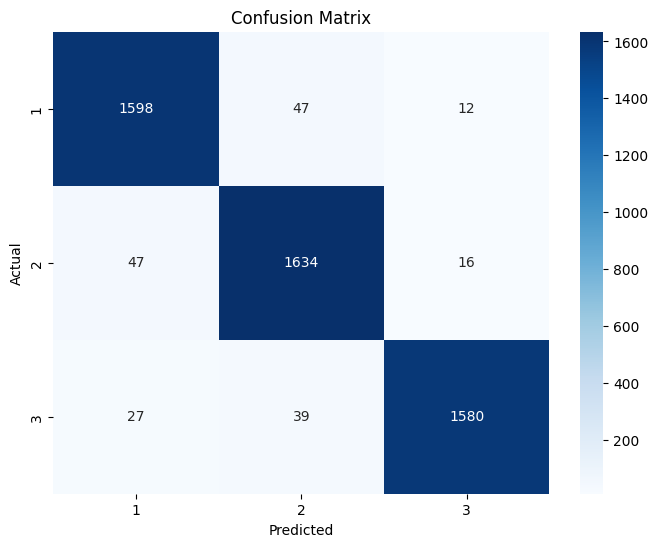

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your X and y data (features and target)
# ... (your existing code for data loading, splitting, and model training) ...

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate performance
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary to a DataFrame for better display
report_df = pd.DataFrame(report_dict).transpose()
print("\nClassification Report:\n", report_df)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=voting_clf.classes_, yticklabels=voting_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Using XGB & Random Forest without remove outlier - 97**

In [ ]:
import pandas as pd

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [ ]:
df=pd.get_dummies(df,columns=["Status","Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
x=df.drop(["Stage"],axis=1)
y=df[["Stage"]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Define individual models
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier(n_estimators=200, random_state=42)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Create Voting Classifier with XGBoost and Random Forest
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('rf', rf)
], voting='soft')  # You can use 'hard' voting as well



In [ ]:
# Now you can fit and use voting_clf as before
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learn...=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.9664

📋 Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.95      0.96      1657
           2       0.95      0.97      0.96      1697
           3       0.97      0.98      0.97      1646

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


🧮 Confusion Matrix:
 [[1579   58   20]
 [  23 1647   27]
 [  14   26 1606]]


Voting Classifier Accuracy: 0.9664

Classification Report:
               precision    recall  f1-score    support
1              0.977104  0.952927  0.964864  1657.0000
2              0.951473  0.970536  0.960910  1697.0000
3              0.971567  0.975699  0.973628  1646.0000
accuracy       0.966400  0.966400  0.966400     0.9664
macro avg      0.966715  0.966387  0.966468  5000.0000
weighted avg   0.966582  0.966400  0.966407  5000.0000


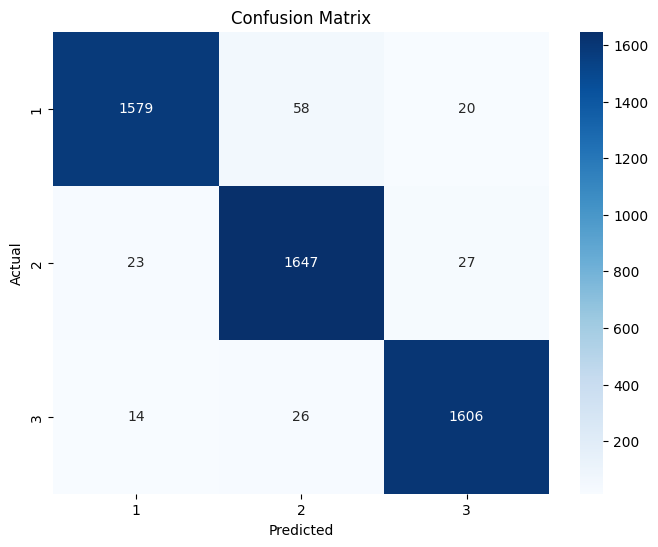

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your X and y data (features and target)
# ... (your existing code for data loading, splitting, and model training) ...

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate performance
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary to a DataFrame for better display
report_df = pd.DataFrame(report_dict).transpose()
print("\nClassification Report:\n", report_df)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=voting_clf.classes_, yticklabels=voting_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle

with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)


# **Using XGB & Random Forest without remove outlier - 97**

In [ ]:
import pandas as pd

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [ ]:
df=pd.get_dummies(df,columns=["Status","Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
x=df.drop(["Stage"],axis=1)
y=df[["Stage"]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Define individual models
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier(n_estimators=200, random_state=42)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Create Voting Classifier with XGBoost and Random Forest
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('rf', rf)
], voting='soft')  # You can use 'hard' voting as well



In [ ]:
# Now you can fit and use voting_clf as before
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:46:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learn...=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.9664

📋 Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.95      0.96      1657
           2       0.95      0.97      0.96      1697
           3       0.97      0.98      0.97      1646

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000


🧮 Confusion Matrix:
 [[1579   58   20]
 [  23 1647   27]
 [  14   26 1606]]


In [ ]:
import pickle

with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)


# **Test Only Scalling Methods**

Applying StandardScaler...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.966

Classification Report:
               precision    recall  f1-score   support
1              0.977090  0.952323  0.964548  1657.000
2              0.950895  0.969947  0.960327  1697.000
3              0.970979  0.975699  0.973333  1646.000
accuracy       0.966000  0.966000  0.966000     0.966
macro avg      0.966322  0.965990  0.966069  5000.000
weighted avg   0.966188  0.966000  0.966007  5000.000


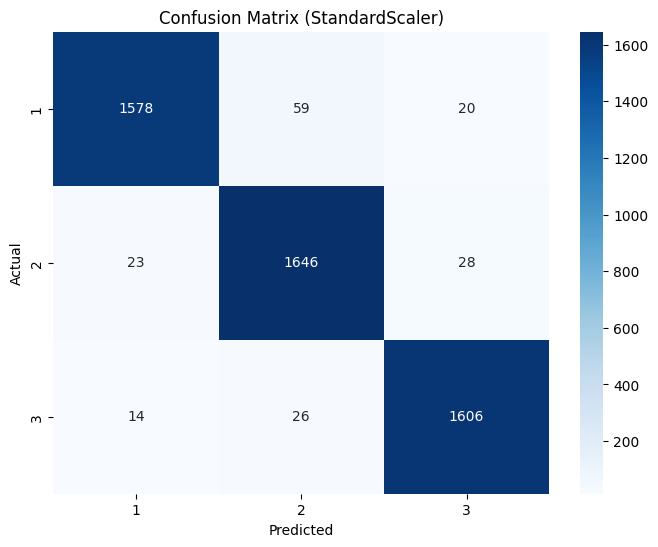

Applying MinMaxScaler...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9662

Classification Report:
               precision    recall  f1-score    support
1              0.977104  0.952927  0.964864  1657.0000
2              0.951445  0.969947  0.960607  1697.0000
3              0.970979  0.975699  0.973333  1646.0000
accuracy       0.966200  0.966200  0.966200     0.9662
macro avg      0.966509  0.966191  0.966268  5000.0000
weighted avg   0.966379  0.966200  0.966207  5000.0000


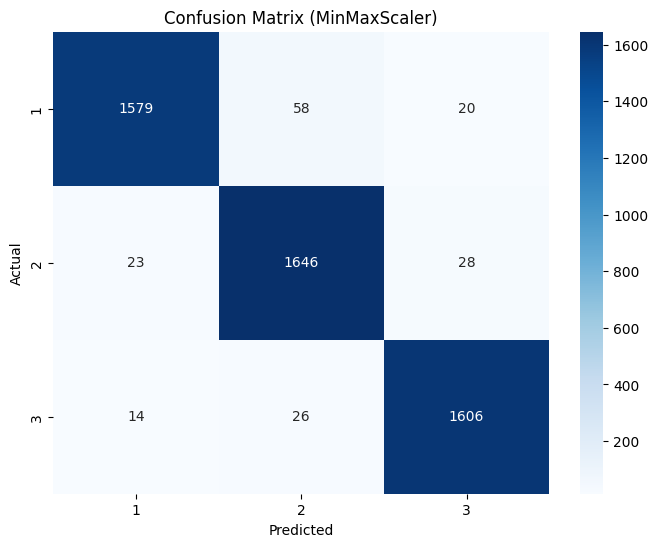

Applying RobustScaler...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9662

Classification Report:
               precision    recall  f1-score    support
1              0.977104  0.952927  0.964864  1657.0000
2              0.951445  0.969947  0.960607  1697.0000
3              0.970979  0.975699  0.973333  1646.0000
accuracy       0.966200  0.966200  0.966200     0.9662
macro avg      0.966509  0.966191  0.966268  5000.0000
weighted avg   0.966379  0.966200  0.966207  5000.0000


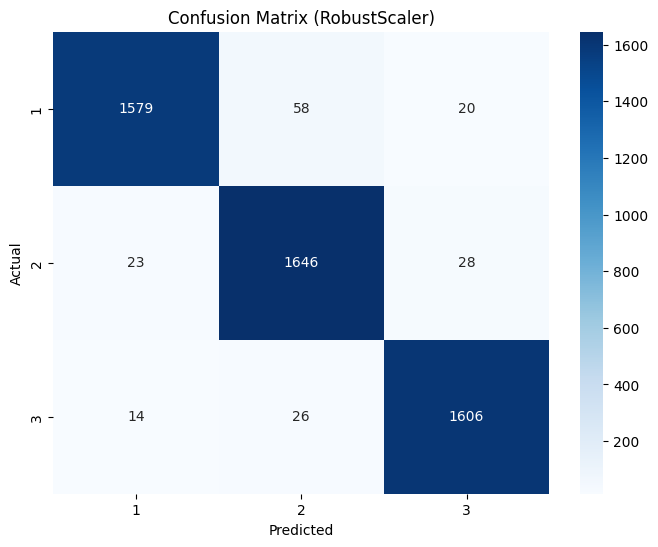

Applying MaxAbsScaler...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9662

Classification Report:
               precision    recall  f1-score    support
1              0.977104  0.952927  0.964864  1657.0000
2              0.951445  0.969947  0.960607  1697.0000
3              0.970979  0.975699  0.973333  1646.0000
accuracy       0.966200  0.966200  0.966200     0.9662
macro avg      0.966509  0.966191  0.966268  5000.0000
weighted avg   0.966379  0.966200  0.966207  5000.0000


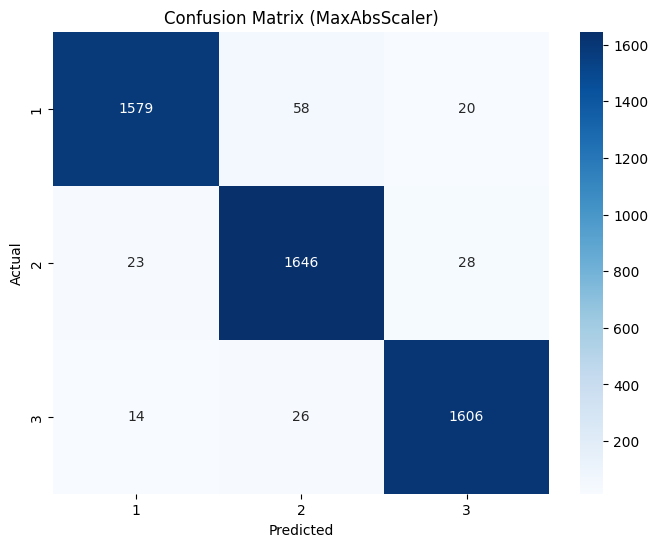

Applying Normalizer...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9364

Classification Report:
               precision    recall  f1-score    support
1              0.942699  0.923355  0.932927  1657.0000
2              0.918981  0.935769  0.927299  1697.0000
3              0.948454  0.950182  0.949317  1646.0000
accuracy       0.936400  0.936400  0.936400     0.9364
macro avg      0.936711  0.936436  0.936514  5000.0000
weighted avg   0.936544  0.936400  0.936413  5000.0000


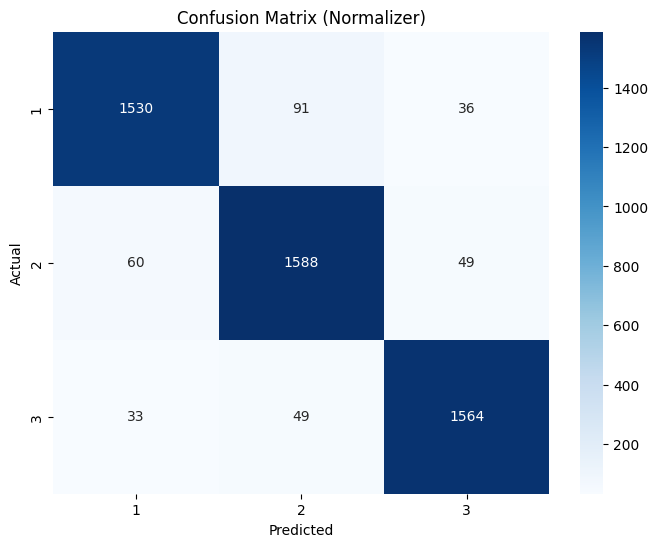

Applying QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:13:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9666

Classification Report:
               precision    recall  f1-score    support
1              0.977118  0.953530  0.965180  1657.0000
2              0.952023  0.970536  0.961191  1697.0000
3              0.971567  0.975699  0.973628  1646.0000
accuracy       0.966600  0.966600  0.966600     0.9666
macro avg      0.966903  0.966588  0.966666  5000.0000
weighted avg   0.966773  0.966600  0.966607  5000.0000


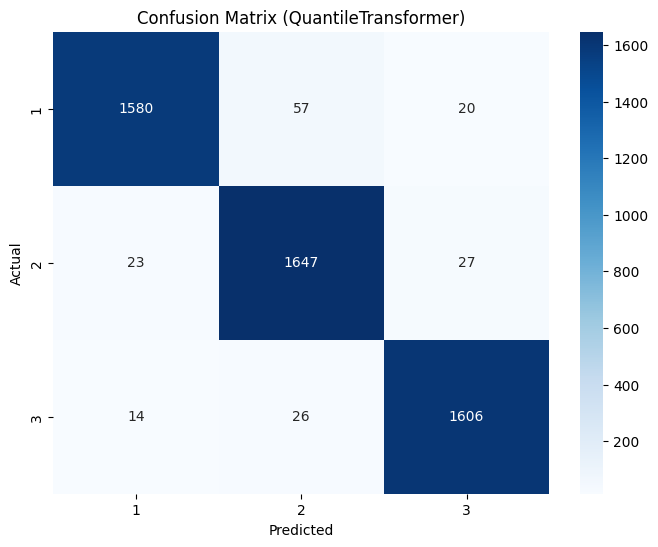

Applying PowerTransformer...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:13:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9664

Classification Report:
               precision    recall  f1-score    support
1              0.977104  0.952927  0.964864  1657.0000
2              0.951473  0.970536  0.960910  1697.0000
3              0.971567  0.975699  0.973628  1646.0000
accuracy       0.966400  0.966400  0.966400     0.9664
macro avg      0.966715  0.966387  0.966468  5000.0000
weighted avg   0.966582  0.966400  0.966407  5000.0000


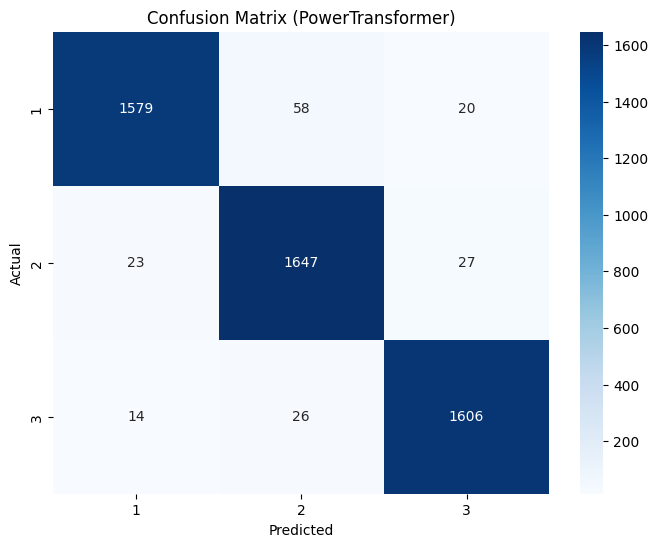

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# Assuming you have your X_train, y_train, X_test, y_test ready

# Define your models (XGBoost and RandomForest)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier(n_estimators=200, random_state=42)


# Define scaling methods
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal'),
    "PowerTransformer": PowerTransformer(method='yeo-johnson')  # You can also use 'box-cox'
}

for scaler_name, scaler in scalers.items():
    print(f"Applying {scaler_name}...")

    # Scale the training and testing data
    X_train_scaled = scaler.fit_transform(X_train) # Fit and transform the scaler on the training data
    X_test_scaled = scaler.transform(X_test) # Transform the test data using the trained scaler

    # Create a VotingClassifier
    voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf)], voting='soft') # Move VotingClassifier inside the loop

    # Fit the model on the scaled training data
    voting_clf.fit(X_train_scaled, y_train) # Train the voting classifier with scaled data

    # Predict on the scaled test set
    y_pred = voting_clf.predict(X_test_scaled)

    # Evaluate performance
    print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

    # Get the classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Convert the report dictionary to a DataFrame for better display
    report_df = pd.DataFrame(report_dict).transpose()
    print("\nClassification Report:\n", report_df)

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=voting_clf.classes_, yticklabels=voting_clf.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({scaler_name})")
    plt.show()

# **Deployment Using Gradio**

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pickle

# Assuming X is your DataFrame or NumPy array containing the features
model_columns = list(x.columns)  # Get the column names

with open('model_columns.pkl', 'wb') as f:
    pickle.dump(model_columns, f)

In [ ]:
import gradio as gr
import pickle
import pandas as pd

# Load model
with open('voting_classifier_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load model columns
with open('model_columns.pkl', 'rb') as f:
    model_columns = pickle.load(f)

# Prediction function
def predict_model(n_days, status, drug, age, sex, ascites, hepatomegaly, spiders, edema, bilirubin, cholesterol,
                  albumin, copper, alk_phos, sgot, triglycerides, platelets, prothrombin):

    # Create single-row dataframe with input values
    input_dict = {
        "N_Days": n_days,
        "Status": status,
        "Drug": drug,
        "Age": age,
        "Sex": sex,
        "Ascites": ascites,
        "Hepatomegaly": hepatomegaly,
        "Spiders": spiders,
        "Edema": edema,
        "Bilirubin": bilirubin,
        "Cholesterol": cholesterol,
        "Albumin": albumin,
        "Copper": copper,
        "Alk_Phos": alk_phos,
        "SGOT": sgot,
        "Triglycerides": triglycerides,
        "Platelets": platelets,
        "Prothrombin": prothrombin
    }

    df = pd.DataFrame([input_dict])

    # One-hot encode categorical variables
    df = pd.get_dummies(df)

    # Add missing columns (if any) that were present during model training
    for col in model_columns:
        if col not in df.columns:
            df[col] = 0

    # Ensure correct column order
    df = df[model_columns]

    # Make prediction
    try:
        stage_prediction = model.predict(df)[0]
    except Exception as e:
        return f"<div style='color:red;'>Error during prediction: {e}</div>"

    # Return styled HTML output
    return f"""
    <div style="text-align:center; padding: 10px;">
        <h2 style='color:#6495ED;'>
            🧬 Predicted Histologic Stage: <b>{stage_prediction}</b>
        </h2>
        <p style="font-size: 16px; font-style: italic;">
            Stage ranges from 1 (mild) to 3 (advanced liver fibrosis)
        </p>
        <hr style="margin: 20px auto; width: 50%;">
        <div style="text-align:left; font-size: 14px;">
            <b>Stage Descriptions:</b><br>
            1️⃣ - Mild disease<br>
            2️⃣ - Moderate disease<br>
            3️⃣ - Advanced fibrosis or cirrhosis
        </div>
    </div>
    """

# UI layout
with gr.Blocks(title="Liver Cirrhosis Stage Predictor") as demo:
    gr.Markdown("## 🧫 Liver Cirrhosis Stage Predictor")
    gr.Markdown("Fill out the patient details below to get a predicted **histologic stage** of cirrhosis.")

    with gr.Row():
        with gr.Column():
            n_days = gr.Slider(0, 8000, step=1, label="N_Days")
            status = gr.Dropdown(['C', 'CL', 'D'], label="Status", info="C: Censored, CL: Transplant, D: Death")
            drug = gr.Dropdown(['D-penicillamine', 'Placebo'], label="Drug Type")
            age = gr.Slider(0, 35000, step=1, label="Age (in days)")
            sex = gr.Dropdown(['M', 'F'], label="Sex")
            ascites = gr.Dropdown(['N', 'Y'], label="Ascites")
            hepatomegaly = gr.Dropdown(['N', 'Y'], label="Hepatomegaly")
            spiders = gr.Dropdown(['N', 'Y'], label="Spiders")
            edema = gr.Dropdown(['N', 'S', 'Y'], label="Edema")

        with gr.Column():
            bilirubin = gr.Slider(0.0, 20.0, step=0.1, label="Bilirubin (mg/dL)")
            cholesterol = gr.Slider(0, 1000, label="Cholesterol (mg/dL)")
            albumin = gr.Slider(1.0, 5.0, step=0.1, label="Albumin (g/dL)")
            copper = gr.Slider(0, 500, label="Urine Copper (μg/day)")
            alk_phos = gr.Slider(0, 3000, label="Alkaline Phosphatase (U/L)")
            sgot = gr.Slider(0, 500, label="SGOT (U/mL)")
            triglycerides = gr.Slider(0, 500, label="Triglycerides (mg/dL)")
            platelets = gr.Slider(0, 1000, label="Platelets (x1000/mL)")
            prothrombin = gr.Slider(0.0, 20.0, step=0.1, label="Prothrombin Time (sec)")

    predict_btn = gr.Button("📊 Predict Histologic Stage")
    result_output = gr.HTML()

    predict_btn.click(
        predict_model,
        inputs=[
            n_days, status, drug, age, sex, ascites, hepatomegaly, spiders, edema,
            bilirubin, cholesterol, albumin, copper, alk_phos, sgot,
            triglycerides, platelets, prothrombin
        ],
        outputs=result_output
    )

demo.launch(share=True, debug=True)  # Set share=True to create a public link and set debug=True to show errors in colab notebook

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e12476a35689591852.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Feature Selection Using XGB & Random Forest without remove outlier - 96.5**

In [ ]:
import pandas as pd

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [ ]:
df=pd.get_dummies(df,columns=["Status","Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
x=df.drop(["Stage"],axis=1)
y=df[["Stage"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, and x are already defined

# Initialize and fit feature selectors before using them:
anova_selector = SelectKBest(f_classif, k=15) # Select top 5 features using ANOVA F-value
anova_selector.fit(X_train, y_train.values.ravel()) # Fit to training data

chi2_selector = SelectKBest(chi2, k=15)  # Select top 5 features using Chi-squared test
chi2_selector.fit(X_train, y_train.values.ravel()) # Fit to training data

# For RFE, you need to specify an estimator (e.g., a RandomForestClassifier)
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=200, random_state=42), n_features_to_select=15)
rfe_selector.fit(X_train, y_train.values.ravel()) # Fit to training data


feature_sets = {
    "ANOVA": (
        anova_selector.transform(X_train),
        anova_selector.transform(X_test),
        x.columns[anova_selector.get_support()]
    ),
    "Chi-Square": (
        chi2_selector.transform(X_train),
        chi2_selector.transform(X_test),
        x.columns[chi2_selector.get_support()]
    ),
    "RFE": (
        rfe_selector.transform(X_train),
        rfe_selector.transform(X_test),
        x.columns[rfe_selector.get_support()]
    ),
}


# Store voting results
voting_results = []

for method, (X_train_selected, X_test_selected, selected_features) in feature_sets.items():
    # Initialize models with your specified parameters
    xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
    rf = RandomForestClassifier(n_estimators=200, random_state=42)

    # Create soft voting classifier
    voting_clf = VotingClassifier(estimators=[
        ('rf', rf),
        ('xgb', xgb)
    ], voting='soft')

    # Train and evaluate
    voting_clf.fit(X_train_selected, y_train)
    y_pred = voting_clf.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)

    voting_results.append({
        "Feature Selection": method,
        "Voting Accuracy": acc,
        "Selected Features": list(selected_features)
    })

# Display results
voting_results_df = pd.DataFrame(voting_results)
pd.set_option('display.max_colwidth', None)  # Show full feature lists
print("\nSoft Voting Results (Custom Parameters):")
print(voting_results_df)



Soft Voting Results (Custom Parameters):
  Feature Selection  Voting Accuracy  \
0             ANOVA           0.9658   
1        Chi-Square           0.9492   
2               RFE           0.9650   

                                                                                                                                                   Selected Features  
0          [N_Days, Age, Albumin, SGOT, Platelets, Prothrombin, Status_C, Status_D, Hepatomegaly_N, Hepatomegaly_Y, Spiders_N, Spiders_Y, Edema_N, Edema_S, Edema_Y]  
1      [N_Days, Age, Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Status_C, Status_D, Hepatomegaly_N, Hepatomegaly_Y, Edema_S, Edema_Y]  
2  [N_Days, Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Ascites_Y, Hepatomegaly_N, Hepatomegaly_Y, Edema_N]  


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, and x are already defined

# Define a range of k values to test
k_values = [5, 10, 15, 20]  # You can adjust this range

# Store voting results
voting_results = []

for k in k_values:
    # Initialize and fit feature selectors for each k
    anova_selector = SelectKBest(f_classif, k=k)
    anova_selector.fit(X_train, y_train.values.ravel())

    chi2_selector = SelectKBest(chi2, k=k)
    chi2_selector.fit(X_train, y_train.values.ravel())

    rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=200, random_state=42), n_features_to_select=k)
    rfe_selector.fit(X_train, y_train.values.ravel())

    feature_sets = {
        "ANOVA": (
            anova_selector.transform(X_train),
            anova_selector.transform(X_test),
            x.columns[anova_selector.get_support()]
        ),
        "Chi-Square": (
            chi2_selector.transform(X_train),
            chi2_selector.transform(X_test),
            x.columns[chi2_selector.get_support()]
        ),
        "RFE": (
            rfe_selector.transform(X_train),
            rfe_selector.transform(X_test),
            x.columns[rfe_selector.get_support()]
        ),
    }

    for method, (X_train_selected, X_test_selected, selected_features) in feature_sets.items():
        # Initialize models
        xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
        rf = RandomForestClassifier(n_estimators=200, random_state=42)

        # Create soft voting classifier
        voting_clf = VotingClassifier(estimators=[
            ('rf', rf),
            ('xgb', xgb)
        ], voting='soft')

        # Train and evaluate
        voting_clf.fit(X_train_selected, y_train)
        y_pred = voting_clf.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)

        voting_results.append({
            "k": k,  # Store the k value
            "Feature Selection": method,
            "Voting Accuracy": acc,
            "Selected Features": list(selected_features)
        })

# Display results
voting_results_df = pd.DataFrame(voting_results)
pd.set_option('display.max_colwidth', None)
print("\nSoft Voting Results (Custom Parameters):")
print(voting_results_df)

# Find the best k value and corresponding accuracy
best_result = voting_results_df.loc[voting_results_df['Voting Accuracy'].idxmax()]
print("\nBest Result:")
print(best_result)


Soft Voting Results (Custom Parameters):
     k Feature Selection  Voting Accuracy  \
0    5             ANOVA           0.9266   
1    5        Chi-Square           0.9426   
2    5               RFE           0.9632   
3   10             ANOVA           0.9652   
4   10        Chi-Square           0.9484   
5   10               RFE           0.9644   
6   15             ANOVA           0.9658   
7   15        Chi-Square           0.9492   
8   15               RFE           0.9650   
9   20             ANOVA           0.9660   
10  20        Chi-Square           0.9596   
11  20               RFE           0.9652   

                                                                                                                                                                                                          Selected Features  
0                                                                                                                                                     

# **Using XGB & Random Forest with remove outlier - 96.42**

In [ ]:
import pandas as pd

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,2221,18499,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,...,False,False,True,True,False,True,False,False,False,True
1,1230,19724,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,...,True,True,False,False,True,True,False,False,False,True
2,4184,11839,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,...,False,True,False,True,False,True,False,False,False,True
3,2090,16467,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,...,False,True,False,True,False,True,False,False,False,True
4,2105,21699,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21233,3584,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,...,False,True,False,True,False,True,False,False,True,False
21234,3584,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,...,False,True,False,True,False,True,False,False,True,False
21235,971,16736,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,...,False,False,True,False,True,False,False,True,True,False
21236,3707,16990,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,...,False,False,True,True,False,True,False,False,True,False


In [ ]:
x=df.drop(["Stage"],axis=1)
y=df[["Stage"]]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Define individual models
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier(n_estimators=100, random_state=42)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Create Voting Classifier with XGBoost and Random Forest
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('rf', rf)
], voting='soft')  # You can use 'hard' voting as well



In [ ]:
# Now you can fit and use voting_clf as before
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.9642184557438794

📋 Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.96      0.96      1527
           2       0.95      0.97      0.96      1383
           3       0.98      0.96      0.97      1338

    accuracy                           0.96      4248
   macro avg       0.96      0.96      0.96      4248
weighted avg       0.96      0.96      0.96      4248


🧮 Confusion Matrix:
 [[1461   50   16]
 [  27 1345   11]
 [  27   21 1290]]


In [ ]:
import pickle

with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)


# **Using XGB & GradientBoost with remove outlier- 96.35**

In [ ]:
import pandas as pd

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")


In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [ ]:
# df=df.drop(["N_Days","Age"],axis=1)

In [ ]:
df=pd.get_dummies(df,columns=["Status","Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])

In [ ]:
x=df.drop(["Stage"],axis=1)
y=df[["Stage"]]

In [ ]:
# models = {
#     "Xgboost": XGBClassifier(n_estimators=200,learning_rate=0.2),
#     "GradientBoost": GradientBoostingClassifier(n_estimators=100,learning_rate=0.5)
# }


In [ ]:
X = df.drop('Stage', axis=1)
y = df['Stage']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier # Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
xgb = XGBClassifier(n_estimators=200,learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.5)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost
}


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('gboost', gboost)
], voting='soft')


In [ ]:
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('gboost',
                              GradientBoostingClassifier(learning_rate=0.5))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Soft Voting Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Soft Voting Accuracy: 0.963512241054614

📋 Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96      1527
           2       0.95      0.97      0.96      1383
           3       0.98      0.96      0.97      1338

    accuracy                           0.96      4248
   macro avg       0.96      0.96      0.96      4248
weighted avg       0.96      0.96      0.96      4248


🧮 Confusion Matrix:
 [[1458   52   17]
 [  25 1348   10]
 [  25   26 1287]]


In [ ]:
import pickle

with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)


# **Loop Voting**

In [ ]:
import itertools
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Define your models
xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, use_label_encoder=False, eval_metric='mlogloss')
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

models = {
    "Xgboost": xgb,
    "GradientBoost": gboost,
    "RandomForest": rf,
    "LogisticRegression": lr,
    "SVC": svc,
    "DecisionTreeClassifier": dt
}

# Loop 1: Evaluate individual models
print("Individual Model Performance:")
for model_name, model in models.items():
    # Ensure y_train has the correct labels before fitting
    # Assuming your original labels were 0, 1, 2, and now they are 1, 2, 3
    y_train_fixed = y_train - 1  # Shift labels down by 1

    model.fit(X_train, y_train_fixed)  # Use the fixed y_train
    y_pred = model.predict(X_test)

    # Adjust predictions back to the original labels if necessary
    y_pred_fixed = y_pred + 1

    accuracy = accuracy_score(y_test, y_pred_fixed)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Loop 2: Evaluate all possible pairs with voting
print("\nVoting Classifier Performance (Pairs):")
for model_names in itertools.combinations(models.keys(), 2):
    model1_name, model2_name = model_names
    model1 = models[model1_name]
    model2 = models[model2_name]

    voting_clf = VotingClassifier(estimators=[(model1_name, model1), (model2_name, model2)], voting='soft')

    # Fix y_train labels before fitting the VotingClassifier
    y_train_fixed = y_train - 1
    voting_clf.fit(X_train, y_train_fixed)

    y_pred = voting_clf.predict(X_test)

    # Adjust predictions back if necessary
    y_pred_fixed = y_pred + 1

    accuracy = accuracy_score(y_test, y_pred_fixed)
    print(f"{model1_name} + {model2_name} Accuracy: {accuracy:.4f}")

Individual Model Performance:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:29:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost Accuracy: 0.9656
GradientBoost Accuracy: 0.9514
RandomForest Accuracy: 0.9570


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.5338


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2137, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1663, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

SVC Accuracy: 0.4958
DecisionTreeClassifier Accuracy: 0.9154

Voting Classifier Performance (Pairs):


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:33:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost + GradientBoost Accuracy: 0.9628


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:33:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost + RandomForest Accuracy: 0.9650


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:34:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Xgboost + LogisticRegression Accuracy: 0.9630


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:34:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost + SVC Accuracy: 0.9638


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:40:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Xgboost + DecisionTreeClassifier Accuracy: 0.9172
GradientBoost + RandomForest Accuracy: 0.9610


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoost + LogisticRegression Accuracy: 0.9420


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2137, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1663, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

# **Apply Feature Selection Technique without remove outler**


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")
df=pd.get_dummies(df,columns=["Status","Sex","Ascites","Hepatomegaly","Spiders","Edema","Drug"])


In [ ]:
df

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Drug_D-penicillamine,Drug_Placebo
0,2221,18499,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,...,False,False,True,True,False,True,False,False,False,True
1,1230,19724,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,...,True,True,False,False,True,True,False,False,False,True
2,4184,11839,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,...,False,True,False,True,False,True,False,False,False,True
3,2090,16467,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,...,False,True,False,True,False,True,False,False,False,True
4,2105,21699,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,...,False,True,False,True,False,True,False,False,True,False
24996,3584,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,...,False,True,False,True,False,True,False,False,True,False
24997,971,16736,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,...,False,False,True,False,True,False,False,True,True,False
24998,3707,16990,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,...,False,False,True,True,False,True,False,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")
df = pd.get_dummies(df, columns=["Status", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug"])

# Separate features (x) and target (y)
x = df.drop('Stage', axis=1)
y = df['Stage']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Stage' column in y
y = encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=5)
X_train_anova = anova_selector.fit_transform(x_train, y_train.ravel())
X_test_anova = anova_selector.transform(x_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=5)
X_train_chi2 = chi2_selector.fit_transform(x_train, y_train.ravel())
X_test_chi2 = chi2_selector.transform(x_test)

# Feature selection using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_train_rfe = rfe_selector.fit_transform(x_train, y_train.ravel())
X_test_rfe = rfe_selector.transform(x_test)

# Models and their selected features
models = {
    "Random Forest (ANOVA)": RandomForestClassifier(),
    "Decision Tree (ANOVA)": DecisionTreeClassifier(),
    "XGBoost (ANOVA)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (ANOVA)": GradientBoostingClassifier(),

    "Random Forest (Chi-Square)": RandomForestClassifier(),
    "Decision Tree (Chi-Square)": DecisionTreeClassifier(),
    "XGBoost (Chi-Square)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (Chi-Square)": GradientBoostingClassifier(),

    "Random Forest (RFE)": RandomForestClassifier(),
    "Decision Tree (RFE)": DecisionTreeClassifier(),
    "XGBoost (RFE)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (RFE)": GradientBoostingClassifier(),
}

# Mapping feature selection methods to their datasets
feature_sets = {
    "ANOVA": (X_train_anova, X_test_anova),
    "Chi-Square": (X_train_chi2, X_test_chi2),
    "RFE": (X_train_rfe, X_test_rfe),
}

# Train, predict, and store results
results = []
for model_name, model in models.items():
    method = model_name.split("(")[-1].split(")")[0]
    X_train_selected, X_test_selected = feature_sets[method]

    model.fit(X_train_selected, y_train.ravel())
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)  # No need to adjust y_pred

    results.append({"Model": model_name, "Accuracy": accuracy})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Get feature names
feature_names = x.columns

# Selected features
anova_selected_features = feature_names[anova_selector.get_support()]
chi2_selected_features = feature_names[chi2_selector.get_support()]
rfe_selected_features = feature_names[rfe_selector.get_support()]

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    'ANOVA': list(anova_selected_features),
    'Chi-Square': list(chi2_selected_features),
    'RFE': list(rfe_selected_features)
})

print(selected_features_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:58:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:58:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:58:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                          Model  Accuracy
0         Random Forest (ANOVA)    0.9204
1         Decision Tree (ANOVA)    0.9184
2               XGBoost (ANOVA)    0.9088
3        Gradient Boost (ANOVA)    0.7668
4    Random Forest (Chi-Square)    0.9286
5    Decision Tree (Chi-Square)    0.8948
6          XGBoost (Chi-Square)    0.9400
7   Gradient Boost (Chi-Square)    0.7962
8           Random Forest (RFE)    0.9544
9           Decision Tree (RFE)    0.9258
10                XGBoost (RFE)    0.9592
11         Gradient Boost (RFE)    0.8362
            ANOVA   Chi-Square          RFE
0          N_Days       N_Days       N_Days
1     Prothrombin          Age          Age
2        Status_D  Cholesterol      Albumin
3  Hepatomegaly_N     Alk_Phos    Platelets
4  Hepatomegaly_Y    Platelets  Prothrombin


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")
df = pd.get_dummies(df, columns=["Status", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug"])

# Separate features (x) and target (y)
x = df.drop('Stage', axis=1)
y = df['Stage']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Stage' column in y
y = encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=7)
X_train_anova = anova_selector.fit_transform(x_train, y_train.ravel())
X_test_anova = anova_selector.transform(x_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=7)
X_train_chi2 = chi2_selector.fit_transform(x_train, y_train.ravel())
X_test_chi2 = chi2_selector.transform(x_test)

# Feature selection using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=7)
X_train_rfe = rfe_selector.fit_transform(x_train, y_train.ravel())
X_test_rfe = rfe_selector.transform(x_test)

# Models and their selected features
models = {
    "Random Forest (ANOVA)": RandomForestClassifier(),
    "Decision Tree (ANOVA)": DecisionTreeClassifier(),
    "XGBoost (ANOVA)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (ANOVA)": GradientBoostingClassifier(),

    "Random Forest (Chi-Square)": RandomForestClassifier(),
    "Decision Tree (Chi-Square)": DecisionTreeClassifier(),
    "XGBoost (Chi-Square)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (Chi-Square)": GradientBoostingClassifier(),

    "Random Forest (RFE)": RandomForestClassifier(),
    "Decision Tree (RFE)": DecisionTreeClassifier(),
    "XGBoost (RFE)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (RFE)": GradientBoostingClassifier(),
}

# Mapping feature selection methods to their datasets
feature_sets = {
    "ANOVA": (X_train_anova, X_test_anova),
    "Chi-Square": (X_train_chi2, X_test_chi2),
    "RFE": (X_train_rfe, X_test_rfe),
}

# Train, predict, and store results
results = []
for model_name, model in models.items():
    method = model_name.split("(")[-1].split(")")[0]
    X_train_selected, X_test_selected = feature_sets[method]

    model.fit(X_train_selected, y_train.ravel())
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)  # No need to adjust y_pred

    results.append({"Model": model_name, "Accuracy": accuracy})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Get feature names
feature_names = x.columns

# Selected features
anova_selected_features = feature_names[anova_selector.get_support()]
chi2_selected_features = feature_names[chi2_selector.get_support()]
rfe_selected_features = feature_names[rfe_selector.get_support()]

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    'ANOVA': list(anova_selected_features),
    'Chi-Square': list(chi2_selected_features),
    'RFE': list(rfe_selected_features)
})

print(selected_features_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:54:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:54:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:54:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                          Model  Accuracy
0         Random Forest (ANOVA)    0.9434
1         Decision Tree (ANOVA)    0.9358
2               XGBoost (ANOVA)    0.9432
3        Gradient Boost (ANOVA)    0.8210
4    Random Forest (Chi-Square)    0.9258
5    Decision Tree (Chi-Square)    0.8942
6          XGBoost (Chi-Square)    0.9366
7   Gradient Boost (Chi-Square)    0.8100
8           Random Forest (RFE)    0.9544
9           Decision Tree (RFE)    0.9114
10                XGBoost (RFE)    0.9604
11         Gradient Boost (RFE)    0.8346
            ANOVA   Chi-Square          RFE
0          N_Days       N_Days       N_Days
1         Albumin          Age          Age
2     Prothrombin  Cholesterol    Bilirubin
3        Status_D       Copper      Albumin
4  Hepatomegaly_N     Alk_Phos         SGOT
5  Hepatomegaly_Y         SGOT    Platelets
6         Edema_N    Platelets  Prothrombin


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")
df = pd.get_dummies(df, columns=["Status", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug"])

# Separate features (x) and target (y)
x = df.drop('Stage', axis=1)
y = df['Stage']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Stage' column in y
y = encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=10)
X_train_anova = anova_selector.fit_transform(x_train, y_train.ravel())
X_test_anova = anova_selector.transform(x_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=10)
X_train_chi2 = chi2_selector.fit_transform(x_train, y_train.ravel())
X_test_chi2 = chi2_selector.transform(x_test)

# Feature selection using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X_train_rfe = rfe_selector.fit_transform(x_train, y_train.ravel())
X_test_rfe = rfe_selector.transform(x_test)

# Models and their selected features
models = {
    "Random Forest (ANOVA)": RandomForestClassifier(),
    "Decision Tree (ANOVA)": DecisionTreeClassifier(),
    "XGBoost (ANOVA)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (ANOVA)": GradientBoostingClassifier(),

    "Random Forest (Chi-Square)": RandomForestClassifier(),
    "Decision Tree (Chi-Square)": DecisionTreeClassifier(),
    "XGBoost (Chi-Square)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (Chi-Square)": GradientBoostingClassifier(),

    "Random Forest (RFE)": RandomForestClassifier(),
    "Decision Tree (RFE)": DecisionTreeClassifier(),
    "XGBoost (RFE)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (RFE)": GradientBoostingClassifier(),
}

# Mapping feature selection methods to their datasets
feature_sets = {
    "ANOVA": (X_train_anova, X_test_anova),
    "Chi-Square": (X_train_chi2, X_test_chi2),
    "RFE": (X_train_rfe, X_test_rfe),
}

# Train, predict, and store results
results = []
for model_name, model in models.items():
    method = model_name.split("(")[-1].split(")")[0]
    X_train_selected, X_test_selected = feature_sets[method]

    model.fit(X_train_selected, y_train.ravel())
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)  # No need to adjust y_pred

    results.append({"Model": model_name, "Accuracy": accuracy})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Get feature names
feature_names = x.columns

# Selected features
anova_selected_features = feature_names[anova_selector.get_support()]
chi2_selected_features = feature_names[chi2_selector.get_support()]
rfe_selected_features = feature_names[rfe_selector.get_support()]

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    'ANOVA': list(anova_selected_features),
    'Chi-Square': list(chi2_selected_features),
    'RFE': list(rfe_selected_features)
})

print(selected_features_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:59:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:59:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:00:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                          Model  Accuracy
0         Random Forest (ANOVA)    0.9542
1         Decision Tree (ANOVA)    0.9364
2               XGBoost (ANOVA)    0.9644
3        Gradient Boost (ANOVA)    0.8384
4    Random Forest (Chi-Square)    0.9288
5    Decision Tree (Chi-Square)    0.8974
6          XGBoost (Chi-Square)    0.9456
7   Gradient Boost (Chi-Square)    0.8170
8           Random Forest (RFE)    0.9546
9           Decision Tree (RFE)    0.9190
10                XGBoost (RFE)    0.9620
11         Gradient Boost (RFE)    0.8504
            ANOVA      Chi-Square             RFE
0          N_Days          N_Days          N_Days
1         Albumin             Age             Age
2       Platelets       Bilirubin       Bilirubin
3     Prothrombin     Cholesterol         Albumin
4        Status_C          Copper          Copper
5        Status_D        Alk_Phos        Alk_Phos
6  Hepatomegaly_N            SGOT            SGOT
7  Hepatomegaly_Y   Tryglicerides       Platelets
8   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")
df = pd.get_dummies(df, columns=["Status", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Drug"])

# Separate features (x) and target (y)
x = df.drop('Stage', axis=1)
y = df['Stage']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Stage' column in y
y = encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=15)
X_train_anova = anova_selector.fit_transform(x_train, y_train.ravel())
X_test_anova = anova_selector.transform(x_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=15)
X_train_chi2 = chi2_selector.fit_transform(x_train, y_train.ravel())
X_test_chi2 = chi2_selector.transform(x_test)

# Feature selection using RFE with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
X_train_rfe = rfe_selector.fit_transform(x_train, y_train.ravel())
X_test_rfe = rfe_selector.transform(x_test)

# Models and their selected features
models = {
    "Random Forest (ANOVA)": RandomForestClassifier(),
    "Decision Tree (ANOVA)": DecisionTreeClassifier(),
    "XGBoost (ANOVA)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (ANOVA)": GradientBoostingClassifier(),

    "Random Forest (Chi-Square)": RandomForestClassifier(),
    "Decision Tree (Chi-Square)": DecisionTreeClassifier(),
    "XGBoost (Chi-Square)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (Chi-Square)": GradientBoostingClassifier(),

    "Random Forest (RFE)": RandomForestClassifier(),
    "Decision Tree (RFE)": DecisionTreeClassifier(),
    "XGBoost (RFE)": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boost (RFE)": GradientBoostingClassifier(),
}

# Mapping feature selection methods to their datasets
feature_sets = {
    "ANOVA": (X_train_anova, X_test_anova),
    "Chi-Square": (X_train_chi2, X_test_chi2),
    "RFE": (X_train_rfe, X_test_rfe),
}

# Train, predict, and store results
results = []
for model_name, model in models.items():
    method = model_name.split("(")[-1].split(")")[0]
    X_train_selected, X_test_selected = feature_sets[method]

    model.fit(X_train_selected, y_train.ravel())
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)  # No need to adjust y_pred

    results.append({"Model": model_name, "Accuracy": accuracy})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Get feature names
feature_names = x.columns

# Selected features
anova_selected_features = feature_names[anova_selector.get_support()]
chi2_selected_features = feature_names[chi2_selector.get_support()]
rfe_selected_features = feature_names[rfe_selector.get_support()]

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    'ANOVA': list(anova_selected_features),
    'Chi-Square': list(chi2_selected_features),
    'RFE': list(rfe_selected_features)
})

print(selected_features_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:02:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:02:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:02:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                          Model  Accuracy
0         Random Forest (ANOVA)    0.9574
1         Decision Tree (ANOVA)    0.9266
2               XGBoost (ANOVA)    0.9652
3        Gradient Boost (ANOVA)    0.8498
4    Random Forest (Chi-Square)    0.9296
5    Decision Tree (Chi-Square)    0.8966
6          XGBoost (Chi-Square)    0.9456
7   Gradient Boost (Chi-Square)    0.8168
8           Random Forest (RFE)    0.9524
9           Decision Tree (RFE)    0.9158
10                XGBoost (RFE)    0.9640
11         Gradient Boost (RFE)    0.8604
             ANOVA      Chi-Square             RFE
0           N_Days          N_Days          N_Days
1              Age             Age             Age
2          Albumin       Bilirubin       Bilirubin
3             SGOT     Cholesterol     Cholesterol
4        Platelets          Copper         Albumin
5      Prothrombin        Alk_Phos          Copper
6         Status_C            SGOT        Alk_Phos
7         Status_D   Tryglicerides            

## Import Libraries

In [ ]:
# !pip install optuna  # Install the missing optuna library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 12.8 MB/s eta 0:00:00


In [ ]:
# !pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.0 MB/s eta 0:00:00


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter
# import optuna

# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import HistGradientBoostingClassifier

# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI Lab Class/Final Project/liver_cirrhosis.csv")
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [ ]:
print(f"Total Missing Values : {df.isnull().sum().sum()}")

Total Missing Values : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [ ]:
# Determination of categorical and numerical variables

cat_cols = list(df.select_dtypes(include="object").columns)
cat_cols.extend(["Stage"])
num_cols = list(df.select_dtypes(include=["int64", "float64"]).columns)
num_cols.remove("Stage")

## Subclass numbers and ratios of categorical variables

Number of Subclasses of Status : 3


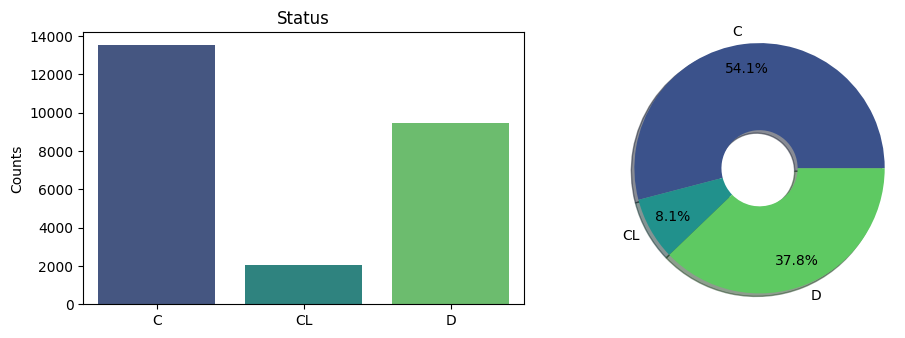

Number of Subclasses of Drug : 2


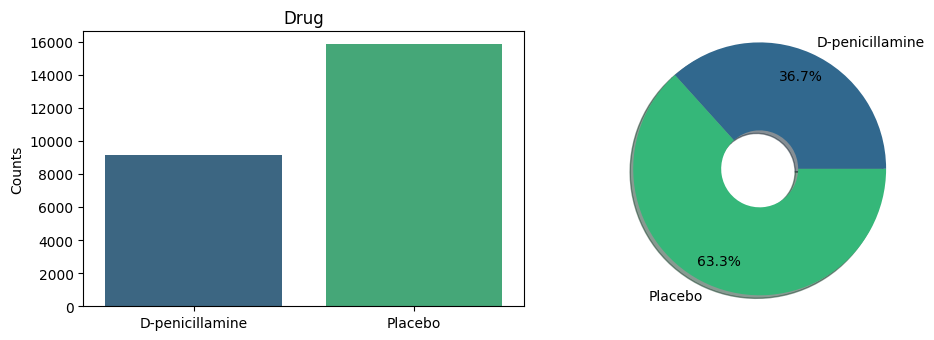

Number of Subclasses of Sex : 2


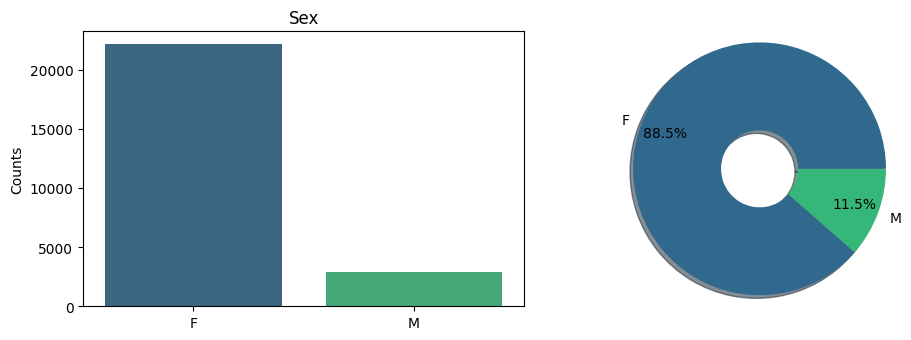

Number of Subclasses of Ascites : 2


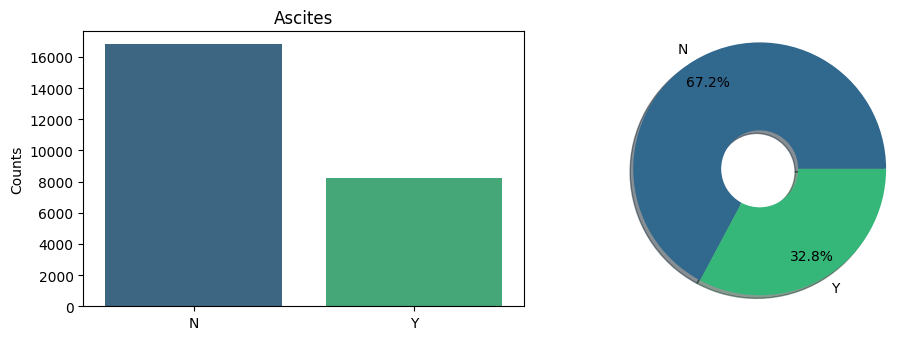

Number of Subclasses of Hepatomegaly : 2


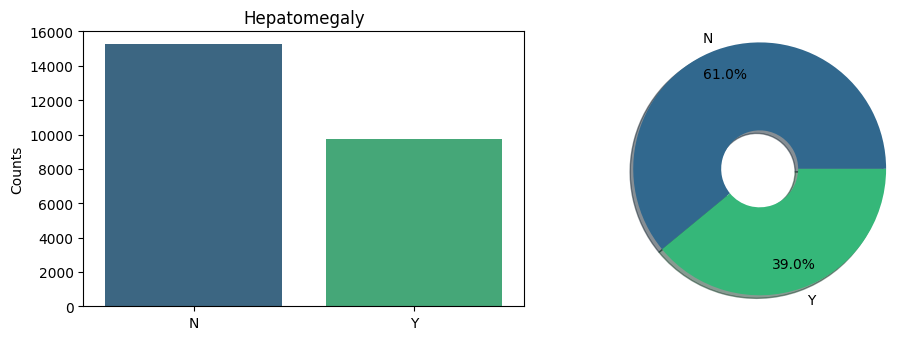

Number of Subclasses of Spiders : 2


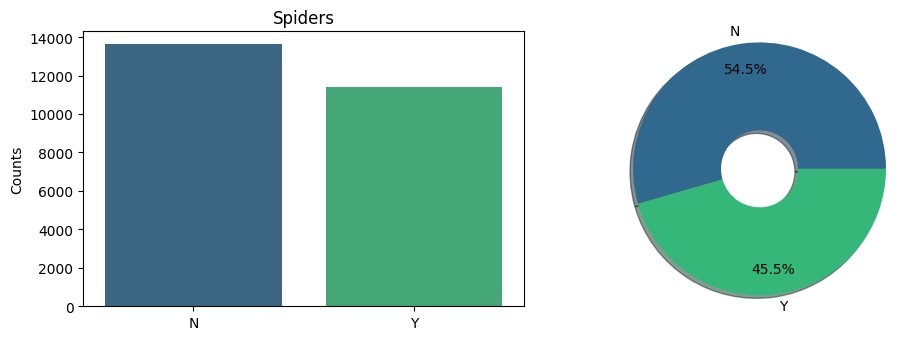

Number of Subclasses of Edema : 3


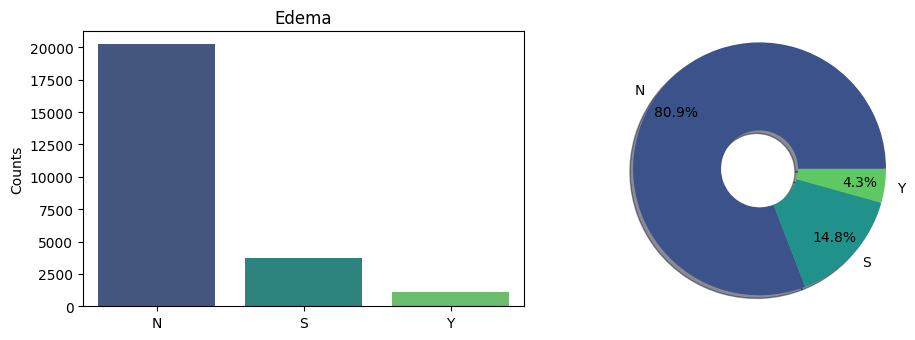

Number of Subclasses of Stage : 3


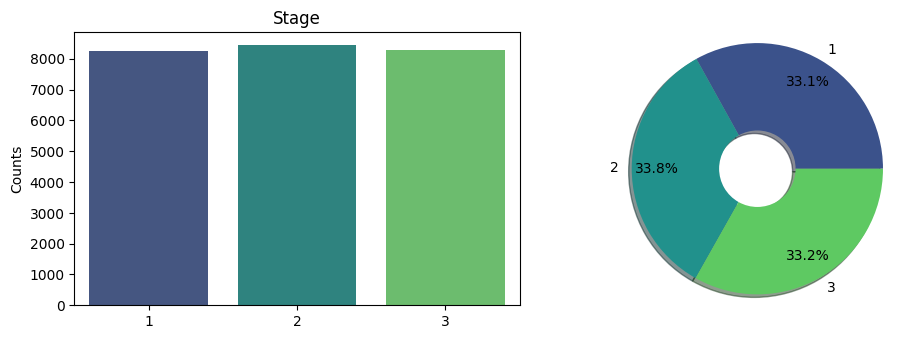

In [ ]:
i = 0
for col in cat_cols:
    plt.figure(figsize=(10, 25))
    subclass_count = df[col].nunique()
    grouped = df.groupby(col)[col].count().reset_index(name="Counts")
    print(f"Number of Subclasses of {col} : {subclass_count}")
    plt.subplot(8, 2, i+1)
    sns.barplot(x=grouped[col], y=grouped["Counts"], palette="viridis")  # Use viridis palette
    plt.xlabel("")
    plt.title(col)
    plt.subplot(8, 2, i+2)
    plt.pie(x=grouped["Counts"], labels=grouped[col], autopct="%.1f%%", pctdistance=0.8,
            colors=sns.color_palette("viridis", subclass_count), radius=1.4-0.25,  # Use viridis colors
            wedgeprops=dict(width=0.8), shadow=True, textprops={'color': "black"})  # Black labels
    i += 2
    plt.tight_layout()
    plt.show()

## Distribution of Numerical Variables

N_Days skewness: 0.54


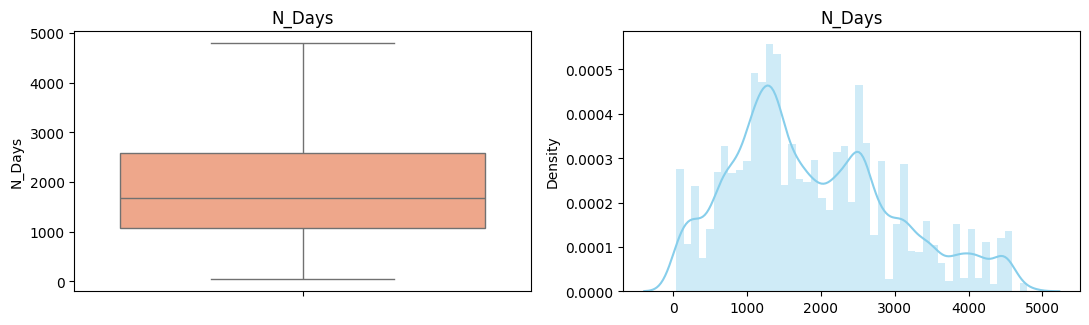

Age skewness: 0.08


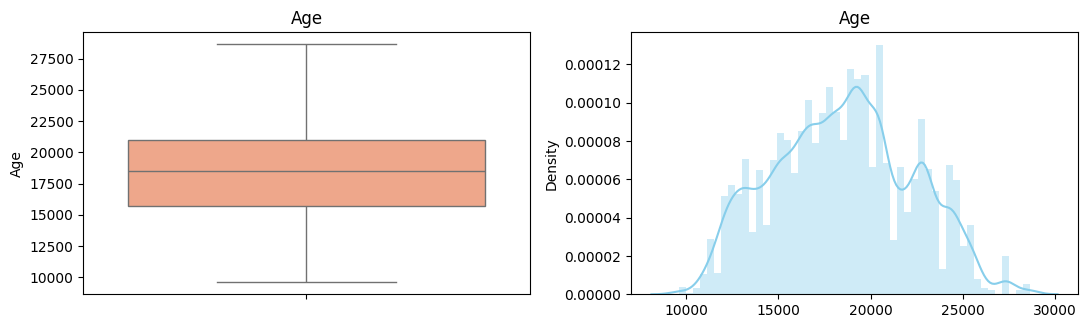

Bilirubin skewness: 2.57


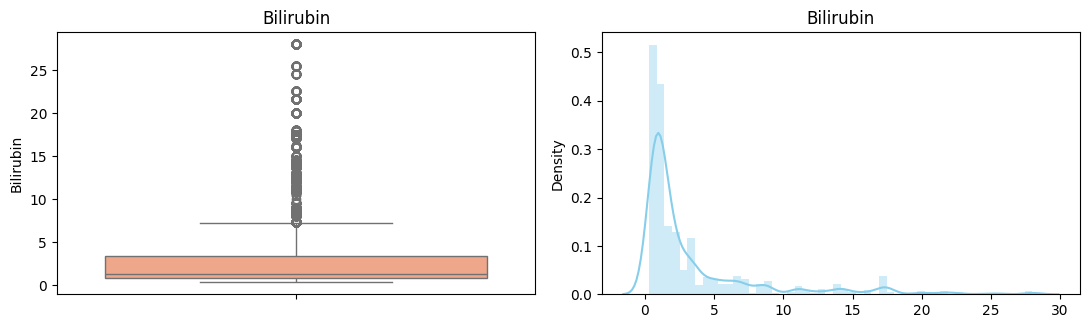

Cholesterol skewness: 4.11


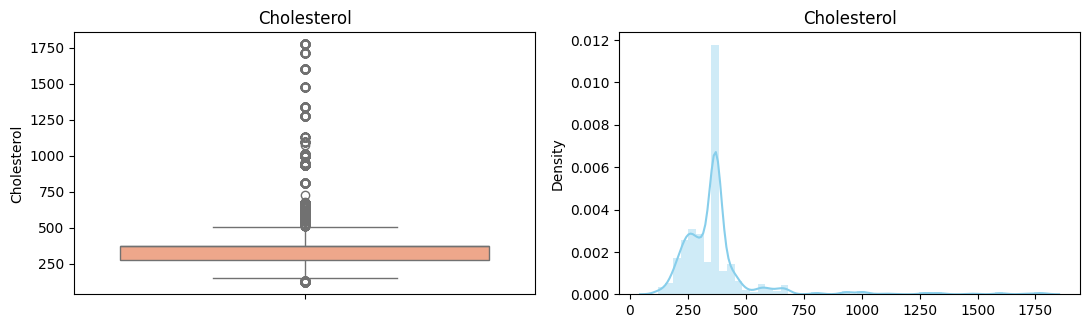

Albumin skewness: -0.53


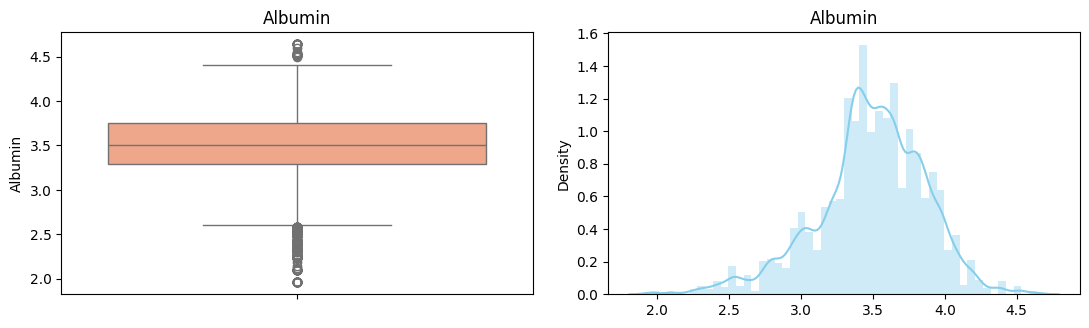

Copper skewness: 2.51


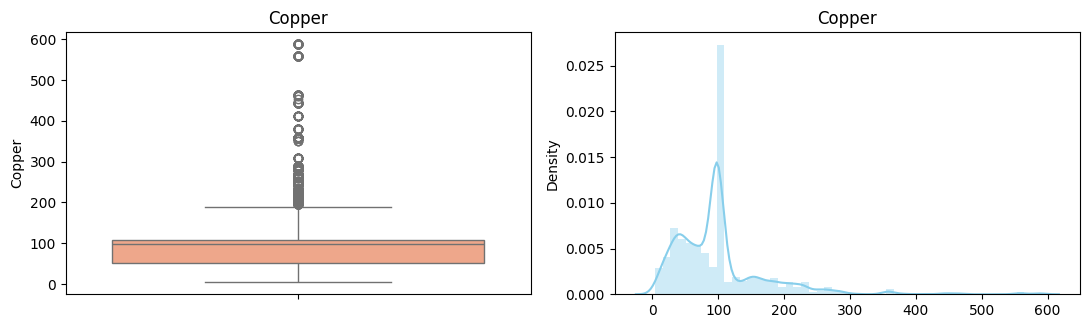

Alk_Phos skewness: 3.39


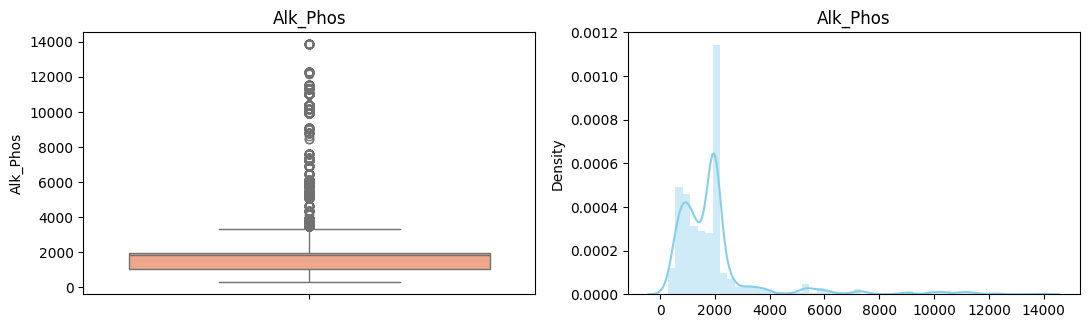

SGOT skewness: 1.41


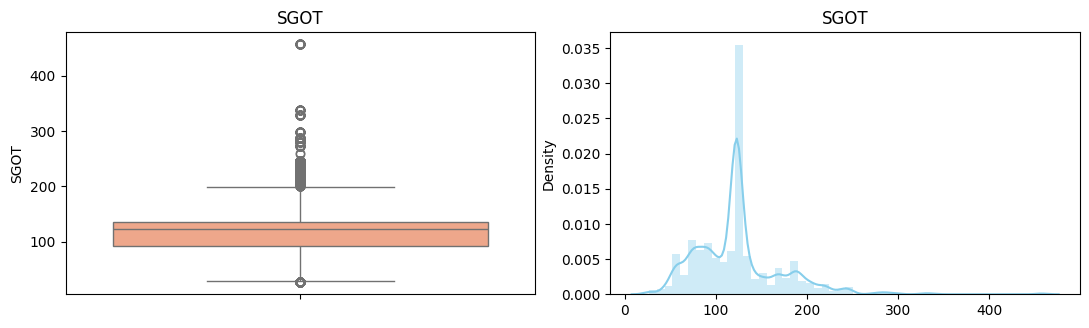

Tryglicerides skewness: 3.28


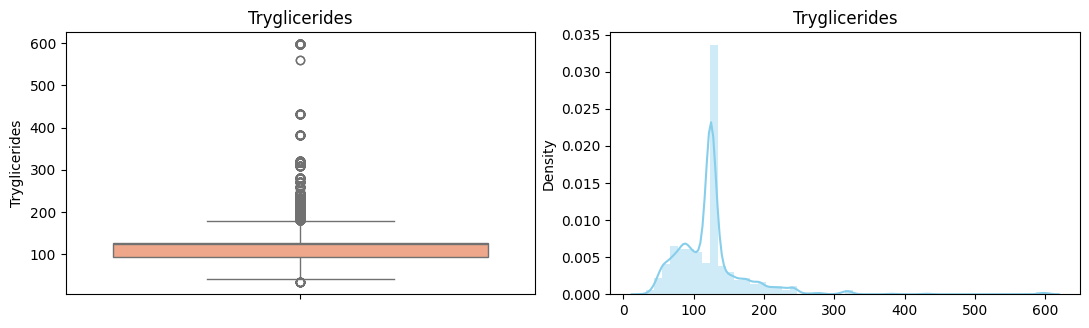

Platelets skewness: 0.76


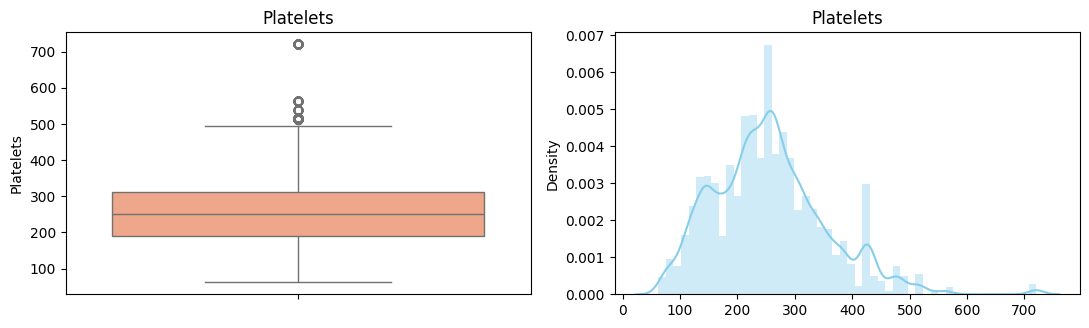

Prothrombin skewness: 1.86


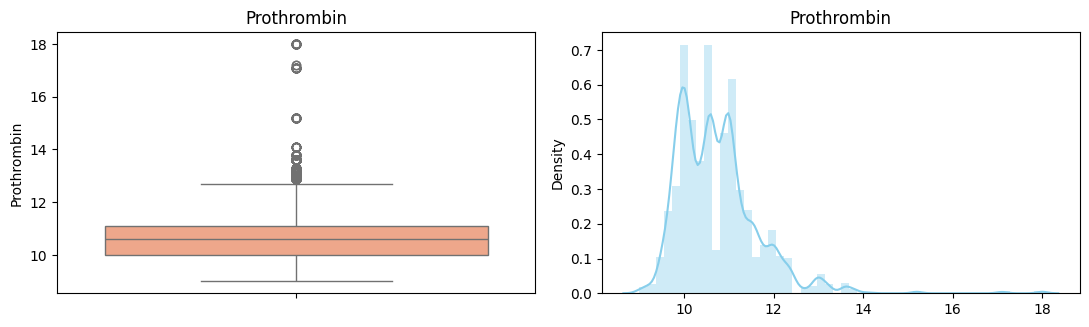

In [ ]:
i = 0
for col in num_cols:
    plt.figure(figsize=(11, 33))
    plt.subplot(11, 2, i + 1)
    sns.boxplot(df[col], color="#FFA07A")  # Light Salmon color for boxplot
    plt.title(col, fontsize=12)
    plt.xlabel("\n")
    plt.subplot(11, 2, i + 2)
    sns.distplot(df[col], color="#87CEEB")  # Sky Blue color for distribution plot
    plt.title(col, fontsize=12)
    plt.xlabel("\n")
    i += 2
    print(f"{col} skewness: {df[col].skew():.2f}")
    plt.tight_layout()
    plt.show()

## Outliers

In [ ]:
outlier_index_list = []

for i in num_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    outlier_step = (Q3-Q1) * 1.5
    outlier_index = df[(df[i] < (Q1 - outlier_step)) | (df[i] > (Q3 + outlier_step))].index
    outlier_index_list.extend(outlier_index)

outlier_list = Counter(outlier_index_list)
outlier_list = list(outlier_list.items())
multi_outliers = [key for key, value in outlier_list if value > 1]

df.drop(multi_outliers, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

## Rates of Categorical Features According to Stages of Liver Cirrhosis

In [ ]:
stage_1 = df[df.Stage == 1]
stage_2 = df[df.Stage == 2]
stage_3 = df[df.Stage == 3]

## Change in Characteristics According to Stages of Liver Cirrhosis

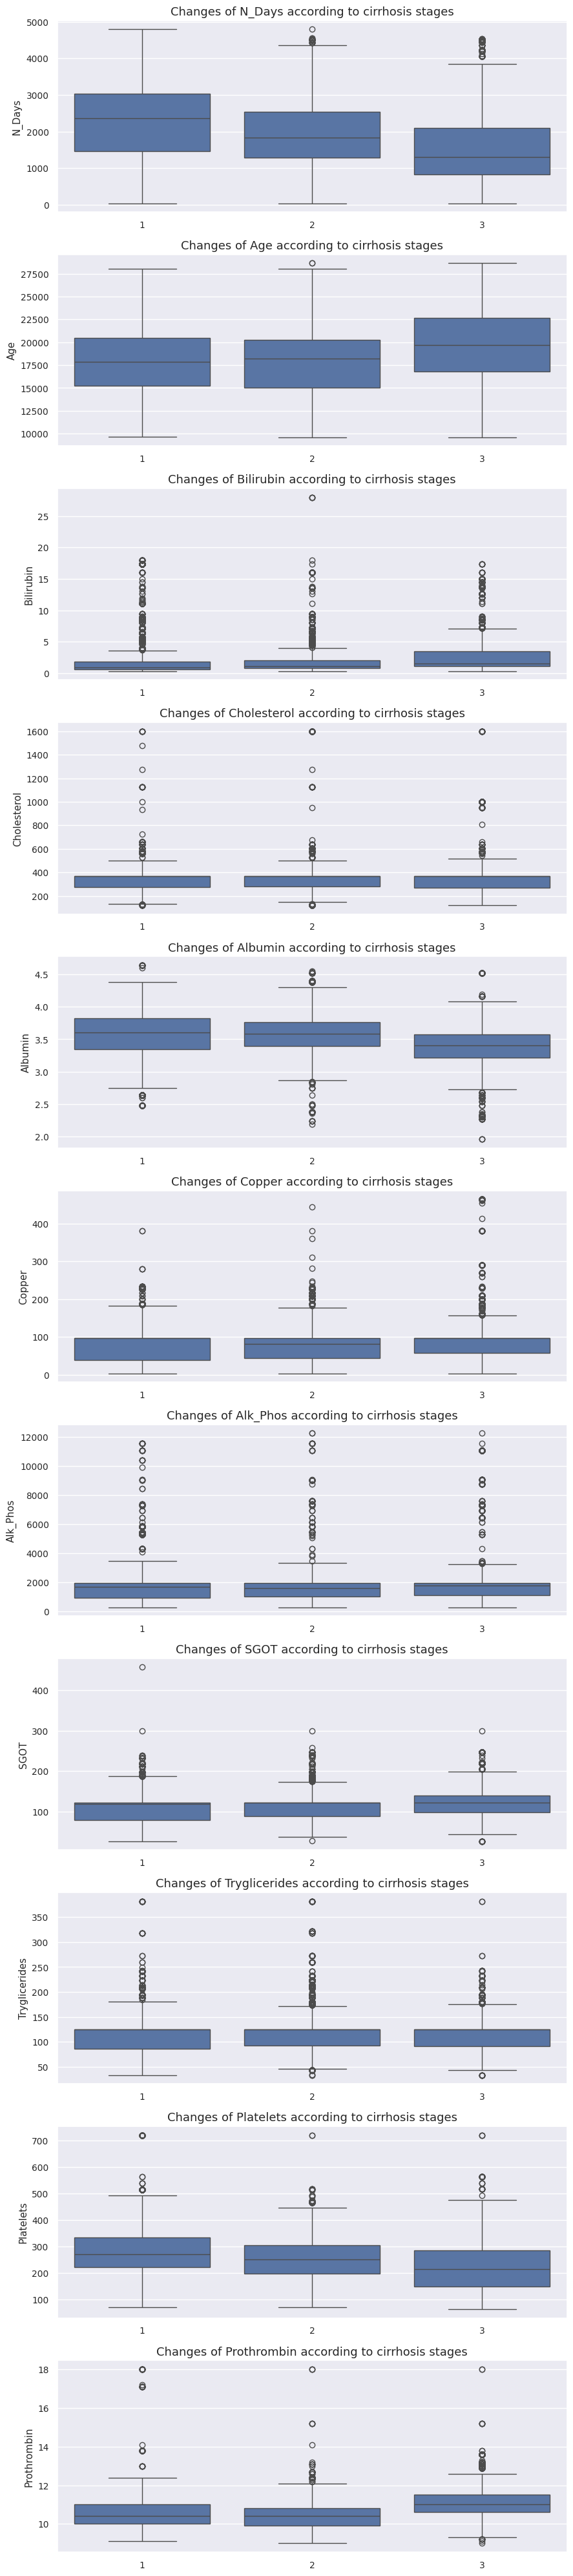

In [ ]:
fig, ax=plt.subplots(nrows=11, ncols=1, figsize=(9, 40))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x="Stage", y=col, ax=ax[i])
    ax[i].set_xlabel("\n")
    ax[i].set_title(f"Changes of {col} according to cirrhosis stages", fontsize=13)

plt.tight_layout()
fig.show()

## Encoding

In [ ]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})

## Correlation Between Variables
> ### Relationship Between Stages of Liver Cirrhosis and Other Variables

In [ ]:
stage_corr = df.corr()["Stage"]
stage_corr = stage_corr.drop("Stage", axis=0).sort_values(ascending=False)

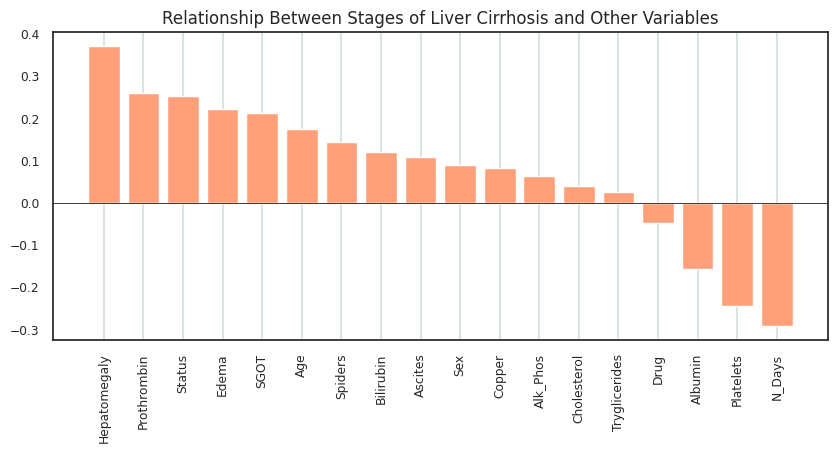

In [ ]:

plt.figure(figsize=(10, 4))
sns.set_style("white")
plt.bar(x=stage_corr.index, height=stage_corr, color="#FFA07A")  # Changed color to a light salmon
plt.xticks(rotation=90)
plt.axhline(0, color="k", lw=0.6)
plt.grid(True, axis="x", lw=0.3, color="#4a804d")
plt.title("Relationship Between Stages of Liver Cirrhosis and Other Variables", fontsize=12)
plt.show()

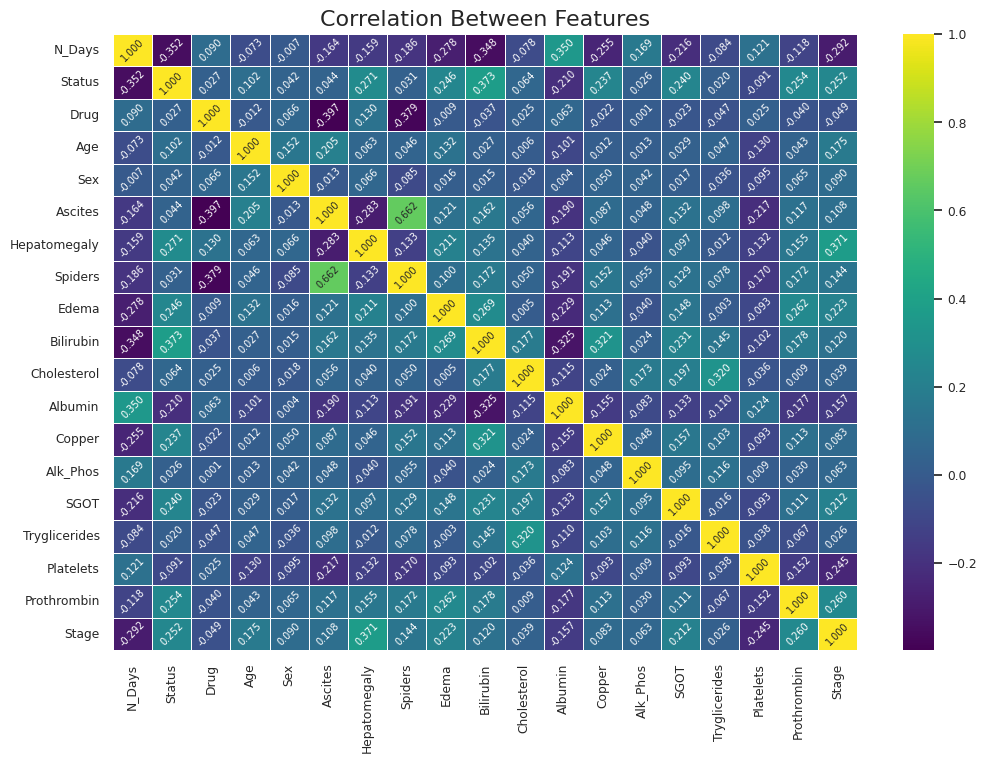

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="viridis", annot_kws={'size': 7, 'rotation': 45})  # Changed cmap
plt.title("Correlation Between Features", fontsize=16)
plt.show()

## Dummies

In [ ]:
data = df[['Stage', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Copper','Alk_Phos',
           'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Status', 'Drug',
           'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Albumin']]

In [ ]:
data = pd.get_dummies(data=data, columns=["Status", "Edema"], drop_first=True)
data.head()

,Stage,N_Days,Age,Bilirubin,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Drug,Sex,Ascites,Hepatomegaly,Spiders,Albumin,Status_1,Status_2,Edema_1,Edema_2
0,1,2221,18499,0.5,149.0,227.0,598.0,52.70,57.0,256.0,...,0,0,0,1,0,4.04,False,False,False,False
1,2,1230,19724,0.5,219.0,22.0,663.0,45.00,75.0,220.0,...,0,1,1,0,1,3.93,False,False,False,False
2,2,4184,11839,0.5,320.0,51.0,1243.0,122.45,80.0,225.0,...,0,0,0,0,0,3.54,False,False,False,False
3,2,2090,16467,0.7,255.0,23.0,1024.0,77.50,58.0,151.0,...,0,0,0,0,0,3.74,False,True,False,False
4,1,2105,21699,1.9,486.0,74.0,1052.0,108.50,109.0,151.0,...,0,0,0,1,0,3.54,False,True,False,False


## Standardization

In [ ]:
scaler = StandardScaler()
data.iloc[:, 1:11] = scaler.fit_transform(data.iloc[:, 1:11])

In [ ]:
y = data["Stage"]
X = data.drop("Stage", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y, random_state=42)

## Final Model

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ... (Load and prepare your data as before) ...

# Directly apply optimized parameters
lgbm_tuned = lgb.LGBMClassifier(
                            boosting_type="gbdt",
                            num_leaves=32,
                            max_depth=14,
                            n_estimators=1166,
                            min_child_samples=5,
                            force_col_wise=True,
                            random_state=42
                        ).fit(X_train, y_train)


[LightGBM] [Info] Total Bins 1825
[LightGBM] [Info] Number of data points in the train set: 16990, number of used features: 20
[LightGBM] [Info] Start training from score -1.031575
[LightGBM] [Info] Start training from score -1.123704
[LightGBM] [Info] Start training from score -1.144191


In [ ]:
pred_lgbm = lgbm_tuned.predict(X_test)

acc = accuracy_score(y_test, pred_lgbm)
cm = confusion_matrix(y_test, pred_lgbm)
class_report = classification_report(y_test, pred_lgbm)

In [ ]:
print(acc)

0.9616290018832392


## Classification Report & Confusion Matrix

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1514
           2       0.95      0.96      0.95      1381
           3       0.97      0.97      0.97      1353

    accuracy                           0.96      4248
   macro avg       0.96      0.96      0.96      4248
weighted avg       0.96      0.96      0.96      4248



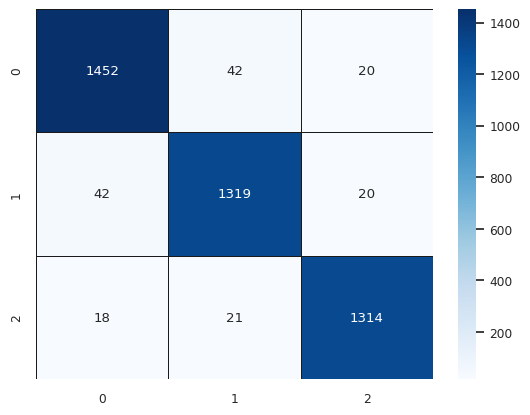

In [ ]:
sns.heatmap(cm, annot=True, fmt="g", linewidths=0.4, cmap="Blues", linecolor="k")
plt.show()

<div class="alert alert-block alert-success"><b> </b> "If this work has provided a different perspective, I would be happy. Feel free to provide constructive criticism to help me improve." 📌 </div>